王の作ったコード


In [50]:
from urllib import request 
import logging
from pathlib import Path
import numpy as np
import re
import MeCab
import random
from gensim import corpora, models
import pandas as pd
from tqdm import tqdm

# データ読み込み

In [49]:
df_content = pd.read_csv('2019-01-01-content.csv')
df_content['text'] = df_content['text'].replace(np.nan, "", regex=True)
df_content['lang'] = df_content['lang'].replace(np.nan, "", regex=True)
# df_nonna = df_content[df_content['text'].isna() == False]
# df_nonna = df_nonna[df_nonna['lang'].isna() == False]
# len(df_nonna)

KeyError: 'text'

In [3]:
# ls_data = !ls data/article

In [51]:
df = pd.DataFrame()
for ll in ls_data:
    df_buf =  pd.read_csv('data/article/' + ll)
    df = pd.concat([df, df_buf], axis = 0,  ignore_index=True)

In [54]:
df["url"][1]

'https://qiita.com/mckeeeen/items/e255b4ac1efba88d0ca1'

In [5]:
len(df)

83842

In [6]:
# df.head(2)

In [7]:
# df["sharing"][:2]
# df["sharing"][1].split(", ")
# if(type(df["sharing"][1]) == "str"):
#     print("a")
# print(type(df["sharing"][1]) is str)


In [8]:
share_list = []
for sh in df["sharing"]:
#     print(share)
    if type(sh) is str:
        share_list.append(sh.split(", "))
    else:
        share_list.append([])

len(share_list)
    

83842

In [9]:
# share_list[1][:10]

In [10]:
d = corpora.Dictionary(share_list)

In [11]:
# share_list = []
# for index, row in df.iterrows():
#     share_list.append()
#     share.append(", ".join(get_shareing(row['html'])))
# df_text = df
# df_text["sharing"] = share

データベースから一年分のデータを読み込む

In [12]:
# 欠損値の数と割合を求める
def missingval_table(df):
    mv_df = pd.DataFrame(df.isnull().sum())
    mv_df = mv_df.rename(columns={0:'null count'})
    mv_df['null count(%)'] = mv_df['null count']/len(df)*100
    mv_df['variation'] = df.nunique().values
    mv_df['variation(%)'] = df.nunique().values/len(df)*100
    return mv_df

missingval_table(df)

,null count,null count(%),variation,variation(%)
Unnamed: 0,0,0.00000,8439,10.065361
id,0,0.00000,83842,100.000000
article_id,0,0.00000,83842,100.000000
title,0,0.00000,83686,99.813936
created_at,0,0.00000,83675,99.800816
likes_count,0,0.00000,672,0.801508
tags_str,0,0.00000,51713,61.679111
url,0,0.00000,83842,100.000000
sharing,309,0.36855,83011,99.008850


# 前処理

In [13]:
# res = request.urlopen("http://svn.sourceforge.jp/svnroot/slothlib/CSharp/Version1/SlothLib/NLP/Filter/StopWord/word/Japanese.txt")
# stopwords = [line.decode("utf-8").strip() for line in res]
# res = request.urlopen("http://svn.sourceforge.jp/svnroot/slothlib/CSharp/Version1/SlothLib/NLP/Filter/StopWord/word/English.txt")
# stopwords += [line.decode("utf-8").strip() for line in res]

# class Tokenizer:
#     def __init__(self, stopwords, parser=None, include_pos=None, exclude_posdetail=None, exclude_reg=None):
    
#         self.stopwords = stopwords
#         self.include_pos = include_pos if include_pos else  ["名詞", "動詞", "形容詞"]
#         self.exclude_posdetail = exclude_posdetail if exclude_posdetail else ["接尾", "数"]
#         self.exclude_reg = exclude_reg if exclude_reg else r"$^"  # no matching reg
#         if parser:
#             self.parser = parser
#         else:
#             mecab = MeCab.Tagger("-Ochasen -d /usr/local/lib/mecab/dic/mecab-ipadic-neologd/")
#             self.parser = mecab.parse
            

#     def tokenize(self, text, show_pos=False):
#         text = re.sub(r"https?://(?:[-\w.]|(?:%[\da-fA-F]{2}))+", "", text)    #URL
#         text = re.sub(r"\"?([-a-zA-Z0-9.`?{}]+\.jp)\"?" ,"", text)  # xxx.jp 
#         text = text.lower()
#         l = [line.split("\t") for line in self.parser(text).split("\n")]
#         res = [
#             i[2] if not show_pos else (i[2],i[3]) for i in l 
#                 if len(i) >=4 # has POS.
#                     and i[3].split("-")[0] in self.include_pos
#                     and i[3].split("-")[1] not in self.exclude_posdetail
#                     and not re.search(r"(-|−)\d", i[2])
#                     and not re.search(self.exclude_reg, i[2])
#                     and i[2] not in self.stopwords]
#         return res

In [14]:
# mecab = MeCab.Tagger("-Ochasen -d /usr/local/lib/mecab/dic/mecab-ipadic-neologd/")
# t = Tokenizer(stopwords + ["…。"] , mecab.parse, exclude_reg=r"\d(年|月|日)")

In [15]:
# t.tokenize("認めたくないものだな。自分自身の若さ故の過ちというものを。")

In [16]:
# t.tokenize("認めたくないものだな。自分自身の若さ故の過ちというものを。", show_pos=True)

In [17]:
# doc_path = "./"
# doc_dir = Path(doc_path)
# dirs = [i for i in doc_dir.iterdir() if i.is_dir()]
# dirs

In [18]:
# articles = [a for categ in dirs for a in categ.iterdir()]
# random.shuffle(articles)

# print(articles[:3])
# num_docs = len(articles)
# print("# of docs:", num_docs)

In [19]:
# num_docs = len(articles)
# num_docs

In [20]:
# class Doc_manager():
#     def __init__(self, docs):
#         self.docs = docs
        
#     def read_doc(self, doc_id):
#         with self.docs[doc_id].open() as f:
#             print(f.read())

In [21]:
# dm = Doc_manager(articles)

In [22]:
# docs = []
# for texts in df_content['text']:
#     docs.append(t.tokenize(texts))

In [23]:
# docs[0][:10]

In [24]:
# d = corpora.Dictionary(docs)

In [25]:
print(len(d))
print(d[1289])
print("python id:",d.token2id["python"])
print("C++ id:",d.token2id["C++"])
print(d.doc2bow(["探索","ノード"]))

305082
移す
python id: 13
C++ id: 7190
[(300, 1), (6103, 1)]


In [26]:
d.filter_extremes(no_below=5, no_above=0.2)
# nob_below以下の個数の単語を無視
# no_aboveの割合以上に出てくる単語を無視
d.compactify()
# idを振り直してコンパクトにする。

In [27]:
dic_num = len(d)
dic_num

52106

In [28]:
d[0]

'Enter'

In [29]:
[(d[t[0]],t[1])for t in sorted(d.dfs.items(),key=lambda x:x[1],reverse=True)]

[('データ', 16355),
 ('コマンド', 16232),
 ('いい', 16142),
 ('情報', 16025),
 ('簡単', 15939),
 ('問題', 15607),
 ('可能', 15317),
 ('エラー', 15255),
 ('内容', 15096),
 ('機能', 15046),
 ('取得', 14470),
 ('実装', 14383),
 ('対応', 14028),
 ('使える', 14025),
 ('くれる', 13624),
 ('入れる', 13619),
 ('起動', 13497),
 ('まとめる', 13360),
 ('入力', 13233),
 ('部分', 13170),
 ('値', 12959),
 ('いう', 12831),
 ('考える', 12796),
 ('状態', 12390),
 ('出力', 12368),
 ('説明', 12319),
 ('ん', 12235),
 ('開発', 12193),
 ('参照', 12109),
 ('選択', 11898),
 ('画面', 11888),
 ('定義', 11857),
 ('やすい', 11816),
 ('関数', 11813),
 ('動作', 11787),
 ('言う', 11656),
 ('アクセス', 11537),
 ('入る', 11536),
 ('調べる', 11293),
 ('多い', 11204),
 ('最後', 11027),
 ('持つ', 10946),
 ('よい', 10854),
 ('バージョン', 10805),
 ('しれる', 10649),
 ('生成', 10424),
 ('動く', 10331),
 ('最初', 10312),
 ('複数', 10129),
 ('記述', 9979),
 ('手順', 9979),
 ('読む', 9961),
 ('用意', 9928),
 ('以外', 9621),
 ('デフォルト', 9592),
 ('管理', 9565),
 ('メモ', 9441),
 ('ライブラリ', 9399),
 ('便利', 9326),
 ('保存', 9121),
 ('()', 9068),
 ('開く', 9045),

In [30]:
# corpus = [d.doc2bow(w) for w in docs]
# test_size = int(len(corpus) * 0.1)
# test_corpus = corpus[:test_size]
# train_corpus= corpus[test_size:]
# print("test size: ", len(test_corpus))
# print("train size: ", len(train_corpus))

In [31]:
corpus = [d.doc2bow(w) for w in share_list]
test_size = int(len(corpus) * 0.1)
test_corpus = corpus[:test_size]
train_corpus= corpus[test_size:]
print("test size: ", len(test_corpus))
print("train size: ", len(train_corpus))

test size:  8384
train size:  75458


# LDAの学習

In [32]:
logging.basicConfig(format='%(message)s', level=logging.INFO)

In [33]:
lda = models.ldamodel.LdaModel(corpus=corpus, id2word=d, num_topics=50, passes=10)

using symmetric alpha at 0.02
using symmetric eta at 0.02
using serial LDA version on this node
running online (multi-pass) LDA training, 50 topics, 10 passes over the supplied corpus of 83842 documents, updating model once every 2000 documents, evaluating perplexity every 20000 documents, iterating 50x with a convergence threshold of 0.001000
PROGRESS: pass 0, at document #2000/83842
merging changes from 2000 documents into a model of 83842 documents
topic #7 (0.020): 0.004*"問題" + 0.004*"データ" + 0.004*"ディレクトリ" + 0.004*"実装" + 0.004*"コマンド" + 0.004*"移動" + 0.003*"情報" + 0.003*"計算" + 0.003*"プログラム" + 0.003*"オプション"
topic #33 (0.020): 0.007*"関数" + 0.005*"バージョン" + 0.005*"情報" + 0.005*"実装" + 0.005*"起動" + 0.004*"削除" + 0.004*"データ" + 0.004*"状態" + 0.004*"選択" + 0.004*"コマンド"
topic #18 (0.020): 0.009*"データ" + 0.005*"問題" + 0.004*"機能" + 0.004*"ユーザー" + 0.004*"値" + 0.004*"関数" + 0.004*"プログラム" + 0.004*"エラー" + 0.004*"投稿" + 0.004*"実装"
topic #12 (0.020): 0.007*"関数" + 0.006*"ライブラリ" + 0.005*"イベント" + 0.005*"wine" + 0

topic #44 (0.020): 0.026*"API" + 0.024*"取得" + 0.024*"サーバー" + 0.024*"接続" + 0.018*"認証" + 0.018*"サーバ" + 0.018*"アクセス" + 0.014*"client" + 0.013*"通信" + 0.013*"ドメイン"
topic #0 (0.020): 0.015*"開発" + 0.015*"テスト" + 0.010*"プロジェクト" + 0.009*"spring" + 0.009*"java" + 0.008*"XML" + 0.007*"データ" + 0.007*"機能" + 0.007*"アノテーション" + 0.007*"ライブラリ"
topic #36 (0.020): 0.035*"起動" + 0.032*"コマンド" + 0.012*"接続" + 0.010*"OS" + 0.010*"ポート" + 0.009*"プロセス" + 0.009*"SSH" + 0.008*"ホスト" + 0.008*"構築" + 0.008*"windows"
topic #3 (0.020): 0.065*"関数" + 0.050*"データ" + 0.026*"python" + 0.016*"出力" + 0.013*"学習" + 0.010*"計算" + 0.010*"実装" + 0.008*"入力" + 0.008*"リスト" + 0.007*"Neural Network"
topic diff=0.485683, rho=0.333333
-11.235 per-word bound, 2409.9 perplexity estimate based on a held-out corpus of 2000 documents with 322224 words
PROGRESS: pass 0, at document #20000/83842
merging changes from 2000 documents into a model of 83842 documents
topic #45 (0.020): 0.032*"関数" + 0.015*"オブジェクト" + 0.014*"ゲーム" + 0.013*"状態" + 0.009*"メソッド" + 0

topic #41 (0.020): 0.024*"トランザクション" + 0.024*"ブロック" + 0.021*"wg" + 0.021*"Blockchain" + 0.021*"suite" + 0.011*"Bitcoin" + 0.010*"取引" + 0.009*"入手可能" + 0.008*"ノード" + 0.008*"FOUNDATION"
topic diff=0.240852, rho=0.242536
PROGRESS: pass 0, at document #36000/83842
merging changes from 2000 documents into a model of 83842 documents
topic #26 (0.020): 0.048*"選択" + 0.044*"クリック" + 0.038*"画面" + 0.030*"入力" + 0.030*"ボタン" + 0.015*"アカウント" + 0.014*"押す" + 0.014*"開く" + 0.014*"項目" + 0.013*"登録"
topic #22 (0.020): 0.071*"PHP" + 0.025*"接続" + 0.019*"Raspberry Pi" + 0.016*"USB" + 0.011*"電源" + 0.011*"LED" + 0.011*"ラズパイ" + 0.010*"温度" + 0.009*"センサー" + 0.009*"Arduino"
topic #21 (0.020): 0.067*"git" + 0.045*"GitHub" + 0.038*"リポジトリ" + 0.030*"ブランチ" + 0.028*"コミット" + 0.021*"セル" + 0.019*"PUSH" + 0.017*"firebase" + 0.014*"ローカル" + 0.013*"管理"
topic #31 (0.020): 0.027*"送信" + 0.021*"メール" + 0.019*"メッセージ" + 0.018*"通知" + 0.017*"SLACK" + 0.016*"送る" + 0.012*"取得" + 0.011*"シート" + 0.010*"受信" + 0.010*"宛先"
topic #33 (0.020): 0.030*"鍵

topic #1 (0.020): 0.043*"Re・Act" + 0.020*"データ" + 0.020*"native" + 0.012*"component" + 0.012*"state" + 0.011*"トレーニング" + 0.011*"予測" + 0.011*"train" + 0.011*"feature" + 0.010*"machine learning"
topic #19 (0.020): 0.026*"IMAGE" + 0.019*"input" + 0.012*"max" + 0.012*"説明" + 0.012*"行動" + 0.011*"方策" + 0.011*"価値" + 0.011*"size" + 0.011*"フレーム" + 0.011*"報酬"
topic #25 (0.020): 0.056*"list" + 0.031*"compile" + 0.025*"G+" + 0.024*"cpp" + 0.023*"STD" + 0.023*"ROS" + 0.022*"Code" + 0.020*"template" + 0.017*"conda" + 0.015*"断片"
topic diff=0.122460, rho=0.196116
PROGRESS: pass 0, at document #54000/83842
merging changes from 2000 documents into a model of 83842 documents
topic #11 (0.020): 0.054*"データ" + 0.049*"テーブル" + 0.030*"db" + 0.029*"データベース" + 0.022*"SQL" + 0.020*"id" + 0.017*"モデル" + 0.016*"MySQL" + 0.015*"削除" + 0.015*"カラム"
topic #42 (0.020): 0.030*"サービス" + 0.018*"システム" + 0.015*"管理" + 0.014*"可能" + 0.013*"機能" + 0.012*"データ" + 0.012*"提供" + 0.011*"リソース" + 0.009*"AZURE" + 0.008*"アプリケーション"
topic #3 (0.020

topic diff=0.079038, rho=0.171499
PROGRESS: pass 0, at document #70000/83842
merging changes from 2000 documents into a model of 83842 documents
topic #11 (0.020): 0.051*"データ" + 0.050*"テーブル" + 0.034*"データベース" + 0.033*"db" + 0.024*"SQL" + 0.019*"MySQL" + 0.018*"id" + 0.018*"モデル" + 0.017*"削除" + 0.016*"カラム"
topic #33 (0.020): 0.038*"鍵" + 0.030*"RUBY" + 0.028*"動画" + 0.026*"公開鍵" + 0.025*"暗号" + 0.025*"SSH" + 0.024*"生成" + 0.024*"署名" + 0.023*"秘密鍵" + 0.019*"暗号化"
topic #7 (0.020): 0.016*"AI" + 0.016*"座標" + 0.011*"描画" + 0.011*"ロボット" + 0.010*"位置" + 0.010*"回転" + 0.008*"移動" + 0.007*"頂点" + 0.007*"方向" + 0.006*"人間"
topic #30 (0.020): 0.039*"API" + 0.031*"ページ" + 0.031*"URL" + 0.023*"リクエスト" + 0.020*"web" + 0.018*"HTML" + 0.015*"Android標準ブラウザ" + 0.014*"JSON" + 0.012*"サイト" + 0.012*"POST"
topic #45 (0.020): 0.027*"状態" + 0.015*"オブジェクト" + 0.014*"関数" + 0.010*"実装" + 0.010*"持つ" + 0.009*"ゲーム" + 0.008*"考える" + 0.007*"パターン" + 0.006*"依存" + 0.006*"オブジェクト指向"
topic diff=0.071722, rho=0.169031
PROGRESS: pass 0, at documen

topic #41 (0.020): 0.057*"ノード" + 0.055*"ブロック" + 0.022*"トランザクション" + 0.018*"ロック" + 0.016*"コントラクト" + 0.015*"Blockchain" + 0.013*"攻撃" + 0.011*"取引" + 0.010*"ネットワーク" + 0.009*"反射"
topic #13 (0.020): 0.041*"出力" + 0.038*"コマンド" + 0.025*"オプション" + 0.013*"標準" + 0.013*"形式" + 0.013*"スクリプト" + 0.011*"ディレクトリ" + 0.010*"ファイル名" + 0.010*"CSV" + 0.009*"ツール"
topic #47 (0.020): 0.034*"flutter" + 0.028*"Xcode" + 0.025*"swift" + 0.020*"命令" + 0.018*"ボード" + 0.018*"ESP" + 0.015*"ST" + 0.014*"レジスタ" + 0.011*"割り込み" + 0.010*"dart"
topic #2 (0.020): 0.026*"データ" + 0.019*"グラフ" + 0.012*"モデル" + 0.012*"予測" + 0.011*"特徴" + 0.011*"用いる" + 0.011*"計算" + 0.010*"パラメータ" + 0.010*"ベクトル" + 0.010*"分布"
topic diff=0.057490, rho=0.150891
PROGRESS: pass 1, at document #4000/83842
merging changes from 2000 documents into a model of 83842 documents
topic #38 (0.020): 0.034*"バージョン" + 0.033*"python" + 0.029*"パッケージ" + 0.029*"ダウンロード" + 0.018*"ビルド" + 0.016*"Folder" + 0.015*"ライブラリ" + 0.015*"windows" + 0.011*"ディレクトリ" + 0.011*"パス"
topic #6 (0.020): 0.

topic #32 (0.020): 0.037*"NOT FOUND" + 0.029*"mod" + 0.027*"ABC" + 0.026*"Scala" + 0.019*"golang" + 0.018*"記号" + 0.018*"時刻" + 0.016*"ショートカットキー" + 0.015*"system" + 0.015*"TEX"
topic diff=0.044881, rho=0.150891
-11.173 per-word bound, 2309.6 perplexity estimate based on a held-out corpus of 2000 documents with 322224 words
PROGRESS: pass 1, at document #20000/83842
merging changes from 2000 documents into a model of 83842 documents
topic #26 (0.020): 0.064*"選択" + 0.057*"クリック" + 0.054*"画面" + 0.040*"ボタン" + 0.038*"入力" + 0.021*"押す" + 0.017*"開く" + 0.015*"登録" + 0.014*"メニュー" + 0.012*"完了"
topic #33 (0.020): 0.042*"鍵" + 0.032*"RUBY" + 0.031*"key" + 0.031*"動画" + 0.027*"公開鍵" + 0.027*"秘密鍵" + 0.025*"生成" + 0.025*"SSH" + 0.022*"署名" + 0.022*"暗号"
topic #38 (0.020): 0.033*"バージョン" + 0.031*"ダウンロード" + 0.031*"python" + 0.030*"パッケージ" + 0.019*"ビルド" + 0.017*"Folder" + 0.016*"windows" + 0.015*"ライブラリ" + 0.011*"ディレクトリ" + 0.011*"パス"
topic #5 (0.020): 0.057*"TO" + 0.039*"AND" + 0.033*"IS" + 0.017*"ON" + 0.015*"YOU" +

topic #29 (0.020): 0.061*"計算" + 0.022*"求める" + 0.020*"frac" + 0.016*"行列" + 0.014*"関数" + 0.013*"theta" + 0.012*"問題" + 0.011*"RM" + 0.011*"PI" + 0.011*"定義"
topic #34 (0.020): 0.027*"文字" + 0.027*"文字列" + 0.019*"変換" + 0.016*"値" + 0.014*"数値" + 0.013*"要素" + 0.013*"数字" + 0.012*"リスト" + 0.011*"単語" + 0.010*"入力"
topic #30 (0.020): 0.045*"API" + 0.036*"URL" + 0.033*"ページ" + 0.023*"リクエスト" + 0.018*"web" + 0.018*"JSON" + 0.016*"HTML" + 0.015*"サイト" + 0.014*"Android標準ブラウザ" + 0.012*"取得"
topic #2 (0.020): 0.022*"データ" + 0.015*"グラフ" + 0.015*"特徴" + 0.013*"予測" + 0.012*"用いる" + 0.012*"アルゴリズム" + 0.011*"平均" + 0.010*"確率" + 0.010*"モデル" + 0.010*"ベクトル"
topic diff=0.052128, rho=0.150891
PROGRESS: pass 1, at document #38000/83842
merging changes from 2000 documents into a model of 83842 documents
topic #45 (0.020): 0.027*"状態" + 0.017*"実装" + 0.013*"持つ" + 0.010*"考える" + 0.009*"依存" + 0.008*"パターン" + 0.007*"関数" + 0.007*"オペランド" + 0.007*"設計" + 0.007*"呼ぶ"
topic #34 (0.020): 0.028*"文字" + 0.027*"文字列" + 0.019*"変換" + 0.015*"値" + 0.01

topic #22 (0.020): 0.034*"接続" + 0.022*"USB" + 0.021*"デバイス" + 0.020*"Raspberry Pi" + 0.015*"Arduino" + 0.014*"LED" + 0.014*"電源" + 0.013*"ラズパイ" + 0.013*"PC" + 0.012*"センサー"
topic diff=0.040255, rho=0.150891
PROGRESS: pass 1, at document #54000/83842
merging changes from 2000 documents into a model of 83842 documents
topic #12 (0.020): 0.062*"モジュール" + 0.053*"UNITY" + 0.036*"オブジェクト" + 0.026*"カメラ" + 0.023*"ゲーム" + 0.022*"配置" + 0.020*"スクリプト" + 0.018*"シーン" + 0.017*"3D" + 0.014*"インポート"
topic #46 (0.020): 0.070*"インスタンス" + 0.048*"ログ" + 0.030*"EC2" + 0.030*"グループ" + 0.029*"タスク" + 0.023*"IP" + 0.017*"VPC" + 0.017*"ルール" + 0.016*"タイプ" + 0.016*"デフォルト"
topic #27 (0.020): 0.042*"メソッド" + 0.041*"クラス" + 0.031*"関数" + 0.027*"変数" + 0.026*"引数" + 0.025*"定義" + 0.022*"値" + 0.020*"オブジェクト" + 0.017*"型" + 0.014*"配列"
topic #31 (0.020): 0.039*"送信" + 0.036*"メッセージ" + 0.027*"メール" + 0.024*"通知" + 0.021*"SLACK" + 0.018*"送る" + 0.016*"bot" + 0.013*"受信" + 0.013*"LINE" + 0.012*"音声"
topic #48 (0.020): 0.010*"読む" + 0.010*"勉強" + 0.00

topic #19 (0.020): 0.046*"()" + 0.021*"input" + 0.016*"text" + 0.015*"フレーム" + 0.015*"IMAGE" + 0.013*"size" + 0.012*"TRUE" + 0.012*"max" + 0.010*"filter" + 0.010*"array"
topic #0 (0.020): 0.028*"開発" + 0.015*"チーム" + 0.011*"java" + 0.010*"プロジェクト" + 0.008*"ツール" + 0.008*"システム" + 0.008*"spring" + 0.008*"改善" + 0.007*"組織" + 0.007*"メンバー"
topic #10 (0.020): 0.036*"イベント" + 0.028*"実装" + 0.018*"プロセス" + 0.014*"THREAD" + 0.013*"()" + 0.013*"関数" + 0.013*"終了" + 0.012*"非同期" + 0.012*"ストリーム" + 0.012*"状態"
topic diff=0.030315, rho=0.150891
PROGRESS: pass 1, at document #72000/83842
merging changes from 2000 documents into a model of 83842 documents
topic #41 (0.020): 0.098*"ノード" + 0.052*"ブロック" + 0.023*"Blockchain" + 0.023*"トランザクション" + 0.021*"ロック" + 0.011*"ネットワーク" + 0.011*"攻撃" + 0.010*"transaction" + 0.009*"取引" + 0.009*"コントラクト"
topic #13 (0.020): 0.047*"コマンド" + 0.040*"出力" + 0.025*"オプション" + 0.016*"スクリプト" + 0.015*"標準" + 0.014*"形式" + 0.014*"ディレクトリ" + 0.013*"変換" + 0.011*"ファイル名" + 0.010*"ツール"
topic #6 (0.020): 0.

topic diff=0.032881, rho=0.149202
PROGRESS: pass 2, at document #4000/83842
merging changes from 2000 documents into a model of 83842 documents
topic #17 (0.020): 0.207*"PHP" + 0.066*"laravel" + 0.024*"composer" + 0.016*"エンティティ" + 0.015*"DI" + 0.013*"n/" + 0.013*"echo" + 0.011*"spark" + 0.011*"名前空間" + 0.011*"cd"
topic #4 (0.020): 0.238*"画像" + 0.070*"プロパティ" + 0.032*"フォント" + 0.026*"生成" + 0.018*"サイズ" + 0.016*"写真" + 0.015*"保存" + 0.015*"GENERATOR" + 0.013*"PNG" + 0.012*"ピクセル"
topic #36 (0.020): 0.048*"起動" + 0.032*"コマンド" + 0.020*"接続" + 0.017*"Linux" + 0.017*"OS" + 0.014*"windows" + 0.013*"SSH" + 0.012*"Ubuntu" + 0.010*"CentOS" + 0.010*"再起動"
topic #32 (0.020): 0.031*"Scala" + 0.028*"mod" + 0.025*"ABC" + 0.019*"system" + 0.019*"A3" + 0.018*"golang" + 0.018*"レジストリ" + 0.016*"Unicode" + 0.015*"JA" + 0.014*"ND"
topic #0 (0.020): 0.029*"開発" + 0.017*"チーム" + 0.012*"プロジェクト" + 0.011*"spring" + 0.009*"java" + 0.008*"システム" + 0.008*"メンバー" + 0.007*"ツール" + 0.007*"改善" + 0.007*"設計"
topic diff=0.030239, rho=0.

topic #38 (0.020): 0.033*"バージョン" + 0.032*"python" + 0.032*"パッケージ" + 0.032*"ダウンロード" + 0.019*"ビルド" + 0.019*"Folder" + 0.017*"windows" + 0.016*"ライブラリ" + 0.012*"ディレクトリ" + 0.011*"パス"
topic #3 (0.020): 0.191*"データ" + 0.055*"python" + 0.053*"関数" + 0.018*"プログラム" + 0.014*"変換" + 0.013*"出力" + 0.012*"ライブラリ" + 0.011*"CSV" + 0.009*"読み込む" + 0.009*"NumPy"
topic #24 (0.020): 0.055*"学習" + 0.044*"モデル" + 0.013*"精度" + 0.012*"GPU" + 0.012*"出力" + 0.011*"入力" + 0.011*"検出" + 0.009*"機械学習" + 0.009*"TensorFlow" + 0.008*"分類"
topic diff=0.034389, rho=0.149202
PROGRESS: pass 2, at document #22000/83842
merging changes from 2000 documents into a model of 83842 documents
topic #23 (0.020): 0.037*"キー" + 0.023*"開く" + 0.022*"移動" + 0.017*"モード" + 0.017*"入力" + 0.015*"vim" + 0.014*"ウィンドウ" + 0.013*"操作" + 0.013*"押す" + 0.013*"キーボード"
topic #28 (0.020): 0.074*"JS" + 0.040*"コンポーネント" + 0.034*"Re・Act" + 0.033*"JavaScript" + 0.029*"Vue" + 0.014*"ライブラリ" + 0.012*"HTML" + 0.012*"webpack" + 0.011*"typescript" + 0.011*"angular"
topic #26 (0

topic diff=0.038747, rho=0.149202
PROGRESS: pass 2, at document #38000/83842
merging changes from 2000 documents into a model of 83842 documents
topic #13 (0.020): 0.048*"コマンド" + 0.042*"出力" + 0.024*"オプション" + 0.020*"スクリプト" + 0.015*"ディレクトリ" + 0.014*"形式" + 0.011*"変換" + 0.011*"ファイル名" + 0.010*"パス" + 0.009*"ツール"
topic #38 (0.020): 0.035*"python" + 0.033*"パッケージ" + 0.032*"バージョン" + 0.031*"ダウンロード" + 0.018*"Folder" + 0.018*"ビルド" + 0.017*"windows" + 0.016*"ライブラリ" + 0.012*"パス" + 0.011*"ディレクトリ"
topic #47 (0.020): 0.077*"命令" + 0.067*"レジスタ" + 0.029*"flutter" + 0.027*"swift" + 0.024*"Xcode" + 0.017*"ST" + 0.013*"プロセッサ" + 0.011*"割り込み" + 0.011*"Sw" + 0.011*"I/O"
topic #1 (0.020): 0.030*"state" + 0.022*"移行" + 0.017*"ReTweet" + 0.017*"feature" + 0.015*"FLOW" + 0.015*"context" + 0.014*"guidelines" + 0.012*"欠損" + 0.012*"props" + 0.012*"EXPO"
topic #7 (0.020): 0.017*"座標" + 0.012*"位置" + 0.012*"AI" + 0.010*"templates" + 0.010*"方向" + 0.009*"回転" + 0.008*"移動" + 0.008*"描画" + 0.007*"図" + 0.007*"距離"
topic diff=0.0286

topic #15 (0.020): 0.114*"docker" + 0.073*"コンテナ" + 0.039*"イメージ" + 0.024*"起動" + 0.020*"Kubernetes" + 0.017*"クラスタ" + 0.015*"pod" + 0.014*"compose" + 0.014*"コマンド" + 0.012*"nginx"
topic #23 (0.020): 0.053*"キー" + 0.023*"開く" + 0.018*"移動" + 0.016*"入力" + 0.014*"キーボード" + 0.014*"操作" + 0.014*"モード" + 0.014*"ctrl" + 0.013*"押す" + 0.012*"機能"
topic #20 (0.020): 0.030*"タグ" + 0.028*"HTML" + 0.028*"要素" + 0.027*"CSS" + 0.012*"色" + 0.011*"スタイル" + 0.010*"テキスト" + 0.010*"デザイン" + 0.010*"記述" + 0.009*"レイアウト"
topic diff=0.027956, rho=0.149202
PROGRESS: pass 2, at document #56000/83842
merging changes from 2000 documents into a model of 83842 documents
topic #36 (0.020): 0.045*"起動" + 0.031*"コマンド" + 0.020*"接続" + 0.017*"OS" + 0.015*"Linux" + 0.014*"SSH" + 0.014*"Ubuntu" + 0.014*"windows" + 0.010*"再起動" + 0.009*"CentOS"
topic #6 (0.020): 0.063*"ユーザー" + 0.062*"ログイン" + 0.043*"ユーザ" + 0.042*"パスワード" + 0.039*"認証" + 0.025*"アクセス" + 0.024*"アカウント" + 0.024*"権限" + 0.022*"user" + 0.014*"登録"
topic #1 (0.020): 0.031*"state" + 0.023*

topic diff=0.022496, rho=0.149202
PROGRESS: pass 2, at document #72000/83842
merging changes from 2000 documents into a model of 83842 documents
topic #31 (0.020): 0.037*"メッセージ" + 0.035*"送信" + 0.029*"通知" + 0.024*"SLACK" + 0.024*"メール" + 0.020*"bot" + 0.018*"送る" + 0.016*"LINE" + 0.012*"音声" + 0.011*"Google"
topic #49 (0.020): 0.291*"テスト" + 0.045*"test" + 0.036*"検証" + 0.024*"セッション" + 0.017*"対象" + 0.017*"CI" + 0.014*"失敗" + 0.012*"Elasticsearch" + 0.011*"チェック" + 0.011*"unittest"
topic #16 (0.020): 0.078*"アプリ" + 0.027*"ANDROID" + 0.021*"開発" + 0.020*"プラグイン" + 0.018*"iOS" + 0.014*"firebase" + 0.014*"実装" + 0.013*"機能" + 0.013*"対応" + 0.011*"UI"
topic #35 (0.020): 0.086*"取得" + 0.035*"検索" + 0.033*"情報" + 0.031*"id" + 0.016*"アクション" + 0.015*"VIEW" + 0.015*"属性" + 0.014*"値" + 0.013*"項目" + 0.013*"リスト"
topic #20 (0.020): 0.032*"要素" + 0.031*"タグ" + 0.029*"HTML" + 0.027*"CSS" + 0.012*"スタイル" + 0.011*"テキスト" + 0.010*"記述" + 0.010*"色" + 0.010*"デザイン" + 0.010*"幅"
topic diff=0.021349, rho=0.149202
PROGRESS: pass 2, a

topic #19 (0.020): 0.083*"()" + 0.019*"input" + 0.018*"TRUE" + 0.017*"text" + 0.017*".S" + 0.014*"max" + 0.013*"array" + 0.013*"フレーム" + 0.013*"False" + 0.012*"size"
topic #8 (0.020): 0.056*"java" + 0.025*"サポート" + 0.022*"リリース" + 0.021*"ansible" + 0.020*"バージョン" + 0.019*"oracle" + 0.015*"ライセンス" + 0.011*"JDK" + 0.010*"GB" + 0.010*"AP"
topic #11 (0.020): 0.058*"テーブル" + 0.042*"db" + 0.039*"データベース" + 0.039*"データ" + 0.027*"SQL" + 0.026*"MySQL" + 0.020*"削除" + 0.020*"モデル" + 0.020*"クエリ" + 0.018*"レコード"
topic #3 (0.020): 0.209*"データ" + 0.054*"python" + 0.026*"関数" + 0.016*"CSV" + 0.016*"プログラム" + 0.015*"変換" + 0.013*"ライブラリ" + 0.011*"data" + 0.010*"出力" + 0.010*"読み込む"
topic diff=0.024216, rho=0.147569
PROGRESS: pass 3, at document #6000/83842
merging changes from 2000 documents into a model of 83842 documents
topic #19 (0.020): 0.075*"()" + 0.017*"col" + 0.016*"input" + 0.016*"TRUE" + 0.015*"text" + 0.015*".S" + 0.014*"方策" + 0.013*"max" + 0.012*"array" + 0.011*"False"
topic #18 (0.020): 0.028*"エラー" + 0.02

topic #10 (0.020): 0.032*"イベント" + 0.024*"プロセス" + 0.017*"THREAD" + 0.017*"実装" + 0.015*"終了" + 0.015*"関数" + 0.014*"状態" + 0.012*"非同期" + 0.012*"ELIXIR" + 0.012*"ストリーム"
topic diff=0.030232, rho=0.147569
PROGRESS: pass 3, at document #22000/83842
merging changes from 2000 documents into a model of 83842 documents
topic #8 (0.020): 0.060*"java" + 0.027*"ansible" + 0.025*"サポート" + 0.022*"バージョン" + 0.021*"リリース" + 0.019*"oracle" + 0.016*"ライセンス" + 0.012*"JDK" + 0.011*"アップデート" + 0.010*"Apache"
topic #14 (0.020): 0.077*"C++" + 0.039*"コンパイル" + 0.033*"clang" + 0.027*"コンパイルエラー" + 0.023*"IEC" + 0.021*"ISO" + 0.019*"N4" + 0.019*"作業" + 0.016*"リンク" + 0.016*"gcc"
topic #7 (0.020): 0.017*"templates" + 0.017*"座標" + 0.014*"位置" + 0.010*"方向" + 0.009*"boost" + 0.009*"AI" + 0.008*"回転" + 0.008*"移動" + 0.007*"色" + 0.007*"距離"
topic #15 (0.020): 0.101*"docker" + 0.081*"コンテナ" + 0.041*"イメージ" + 0.024*"起動" + 0.023*"Kubernetes" + 0.015*"nginx" + 0.015*"pod" + 0.014*"クラスタ" + 0.014*"コマンド" + 0.012*"compose"
topic #25 (0.020): 0.

topic #4 (0.020): 0.277*"画像" + 0.035*"フォント" + 0.026*"サイズ" + 0.024*"プロパティ" + 0.023*"生成" + 0.021*"保存" + 0.018*"IMAGE" + 0.018*"写真" + 0.014*"変換" + 0.014*"PNG"
topic #13 (0.020): 0.052*"コマンド" + 0.043*"出力" + 0.024*"オプション" + 0.021*"スクリプト" + 0.017*"ディレクトリ" + 0.014*"形式" + 0.011*"ファイル名" + 0.011*"変換" + 0.011*"パス" + 0.009*"標準"
topic #16 (0.020): 0.077*"アプリ" + 0.031*"ANDROID" + 0.023*"プラグイン" + 0.021*"開発" + 0.020*"iOS" + 0.015*"firebase" + 0.013*"実装" + 0.013*"native" + 0.012*"対応" + 0.011*"機能"
topic #43 (0.020): 0.043*"メモリ" + 0.030*"bit" + 0.022*"サイズ" + 0.021*"アドレス" + 0.018*"cpu" + 0.018*"領域" + 0.014*"バイト" + 0.013*"命令" + 0.012*"浮動" + 0.012*"パーティション"
topic diff=0.024549, rho=0.147569
-11.809 per-word bound, 3587.3 perplexity estimate based on a held-out corpus of 2000 documents with 331732 words
PROGRESS: pass 3, at document #40000/83842
merging changes from 2000 documents into a model of 83842 documents
topic #29 (0.020): 0.066*"計算" + 0.033*"関数" + 0.025*"求める" + 0.019*"行列" + 0.017*"frac" + 0.017*"問題"

topic #38 (0.020): 0.038*"python" + 0.034*"パッケージ" + 0.031*"バージョン" + 0.031*"ダウンロード" + 0.019*"windows" + 0.019*"ビルド" + 0.018*"ライブラリ" + 0.017*"Folder" + 0.012*"パス" + 0.011*"py"
topic diff=0.024986, rho=0.147569
PROGRESS: pass 3, at document #56000/83842
merging changes from 2000 documents into a model of 83842 documents
topic #47 (0.020): 0.041*"命令" + 0.033*"Xcode" + 0.030*"flutter" + 0.030*"swift" + 0.027*"レジスタ" + 0.017*"dart" + 0.016*"ST" + 0.014*"ESP" + 0.011*"E1" + 0.011*"Ar"
topic #42 (0.020): 0.040*"サービス" + 0.021*"機能" + 0.019*"可能" + 0.017*"管理" + 0.015*"提供" + 0.014*"アプリケーション" + 0.013*"システム" + 0.012*"リソース" + 0.012*"AZURE" + 0.009*"情報"
topic #49 (0.020): 0.289*"テスト" + 0.045*"test" + 0.035*"検証" + 0.021*"CI" + 0.019*"セッション" + 0.015*"対象" + 0.015*"修正" + 0.012*"失敗" + 0.012*"Elasticsearch" + 0.011*"チェック"
topic #5 (0.020): 0.059*"TO" + 0.039*"AND" + 0.031*"IS" + 0.017*"YOU" + 0.015*"ON" + 0.015*"WITH" + 0.011*"BY" + 0.011*"It" + 0.009*"object" + 0.008*"application"
topic #29 (0.020): 0.068*"計

topic #16 (0.020): 0.080*"アプリ" + 0.027*"ANDROID" + 0.022*"開発" + 0.020*"プラグイン" + 0.019*"firebase" + 0.018*"iOS" + 0.015*"実装" + 0.012*"対応" + 0.012*"機能" + 0.011*"UI"
topic #26 (0.020): 0.067*"選択" + 0.060*"クリック" + 0.057*"画面" + 0.048*"ボタン" + 0.043*"入力" + 0.024*"押す" + 0.019*"開く" + 0.015*"メニュー" + 0.013*"完了" + 0.012*"登録"
topic #45 (0.020): 0.020*"実装" + 0.015*"状態" + 0.013*"考える" + 0.012*"持つ" + 0.008*"言う" + 0.008*"機能" + 0.008*"やすい" + 0.007*"存在" + 0.007*"パターン" + 0.007*"問題"
topic #6 (0.020): 0.071*"ユーザー" + 0.062*"ログイン" + 0.049*"ユーザ" + 0.048*"認証" + 0.041*"パスワード" + 0.027*"アカウント" + 0.024*"user" + 0.024*"アクセス" + 0.023*"権限" + 0.019*"登録"
topic diff=0.018611, rho=0.147569
PROGRESS: pass 3, at document #74000/83842
merging changes from 2000 documents into a model of 83842 documents
topic #29 (0.020): 0.070*"計算" + 0.030*"関数" + 0.025*"求める" + 0.019*"行列" + 0.019*"問題" + 0.015*"frac" + 0.014*"theta" + 0.013*"考える" + 0.012*"解" + 0.011*"表す"
topic #47 (0.020): 0.038*"命令" + 0.036*"swift" + 0.036*"Xcode" + 0.035*"flut

topic #2 (0.020): 0.013*"データ" + 0.013*"値" + 0.013*"グラフ" + 0.013*"変数" + 0.012*"予測" + 0.012*"アルゴリズム" + 0.012*"平均" + 0.012*"用いる" + 0.011*"分布" + 0.011*"特徴"
topic diff=0.021871, rho=0.145988
PROGRESS: pass 4, at document #6000/83842
merging changes from 2000 documents into a model of 83842 documents
topic #35 (0.020): 0.092*"取得" + 0.036*"情報" + 0.034*"id" + 0.032*"検索" + 0.019*"アクション" + 0.014*"VIEW" + 0.014*"値" + 0.014*"属性" + 0.013*"一覧" + 0.012*"リスト"
topic #13 (0.020): 0.053*"コマンド" + 0.046*"出力" + 0.027*"オプション" + 0.020*"スクリプト" + 0.018*"ディレクトリ" + 0.012*"形式" + 0.012*"標準" + 0.011*"パス" + 0.010*"ファイル名" + 0.009*"変換"
topic #34 (0.020): 0.034*"文字列" + 0.028*"文字" + 0.024*"配列" + 0.022*"要素" + 0.019*"リスト" + 0.019*"値" + 0.013*"入力" + 0.012*"数字" + 0.012*"条件" + 0.012*"数値"
topic #19 (0.020): 0.083*"()" + 0.019*".S" + 0.018*"TRUE" + 0.017*"col" + 0.016*"input" + 0.013*"text" + 0.013*"方策" + 0.013*"array" + 0.013*"max" + 0.012*"False"
topic #23 (0.020): 0.036*"キー" + 0.023*"開く" + 0.019*"移動" + 0.018*"モード" + 0.016*"入

topic #49 (0.020): 0.288*"テスト" + 0.044*"test" + 0.043*"検証" + 0.023*"セッション" + 0.017*"修正" + 0.016*"チェック" + 0.015*"対象" + 0.015*"CI" + 0.012*"Elasticsearch" + 0.012*"失敗"
topic #20 (0.020): 0.032*"HTML" + 0.032*"要素" + 0.032*"タグ" + 0.027*"CSS" + 0.011*"テキスト" + 0.011*"スタイル" + 0.010*"記述" + 0.010*"ページ" + 0.009*"デザイン" + 0.009*"レイアウト"
topic #37 (0.020): 0.083*"AWS" + 0.047*"CLOUD" + 0.035*"S3" + 0.026*"lambda" + 0.017*"Amazon" + 0.017*"アップロード" + 0.016*"バケット" + 0.016*"サービス" + 0.015*"リージョン" + 0.015*"Lambda"
topic #17 (0.020): 0.203*"PHP" + 0.070*"laravel" + 0.023*"composer" + 0.022*"LS" + 0.020*"cd" + 0.019*"DI" + 0.016*"txt" + 0.015*"var" + 0.015*"名前空間" + 0.013*"home"
topic diff=0.026202, rho=0.145988
PROGRESS: pass 4, at document #24000/83842
merging changes from 2000 documents into a model of 83842 documents
topic #47 (0.020): 0.049*"flutter" + 0.036*"swift" + 0.036*"命令" + 0.034*"Xcode" + 0.022*"レジスタ" + 0.018*"ST" + 0.017*"ESP" + 0.012*"Sw" + 0.011*"割り込み" + 0.010*"E1"
topic #18 (0.020): 0.028*"エ

topic #36 (0.020): 0.046*"起動" + 0.029*"コマンド" + 0.020*"接続" + 0.017*"OS" + 0.015*"Linux" + 0.015*"Ubuntu" + 0.014*"SSH" + 0.012*"windows" + 0.011*"CentOS" + 0.011*"再起動"
topic diff=0.022431, rho=0.145988
-11.807 per-word bound, 3582.7 perplexity estimate based on a held-out corpus of 2000 documents with 331732 words
PROGRESS: pass 4, at document #40000/83842
merging changes from 2000 documents into a model of 83842 documents
topic #16 (0.020): 0.077*"アプリ" + 0.032*"ANDROID" + 0.023*"プラグイン" + 0.022*"開発" + 0.020*"iOS" + 0.018*"firebase" + 0.013*"実装" + 0.013*"native" + 0.012*"SDK" + 0.012*"対応"
topic #11 (0.020): 0.064*"テーブル" + 0.049*"db" + 0.041*"データベース" + 0.034*"データ" + 0.031*"MySQL" + 0.028*"SQL" + 0.020*"モデル" + 0.020*"カラム" + 0.019*"レコード" + 0.019*"クエリ"
topic #22 (0.020): 0.032*"接続" + 0.028*"デバイス" + 0.021*"USB" + 0.019*"Raspberry Pi" + 0.017*"PC" + 0.014*"Arduino" + 0.013*"ラズパイ" + 0.013*"電源" + 0.012*"LED" + 0.012*"信号"
topic #27 (0.020): 0.049*"関数" + 0.048*"クラス" + 0.045*"メソッド" + 0.029*"定義" + 0

topic #9 (0.020): 0.267*"プロパティ" + 0.044*"キャッシュ" + 0.021*"C#" + 0.017*"Microsoft" + 0.015*"セット" + 0.014*".NET" + 0.014*"Visual Studio" + 0.013*"アプリケーション" + 0.013*"コントロール" + 0.012*"core"
topic #3 (0.020): 0.240*"データ" + 0.049*"python" + 0.019*"CSV" + 0.017*"グラフ" + 0.014*"data" + 0.013*"変換" + 0.012*"分析" + 0.011*"ライブラリ" + 0.010*"抽出" + 0.010*"保存"
topic #7 (0.020): 0.015*"座標" + 0.014*"位置" + 0.011*"方向" + 0.010*"移動" + 0.010*"図" + 0.009*"色" + 0.008*"距離" + 0.008*"回転" + 0.007*"軸" + 0.007*"ロボット"
topic #46 (0.020): 0.072*"インスタンス" + 0.048*"ログ" + 0.035*"グループ" + 0.029*"EC2" + 0.029*"タスク" + 0.021*"IP" + 0.019*"ルール" + 0.017*"タイプ" + 0.017*"VPC" + 0.016*"デフォルト"
topic diff=0.028868, rho=0.145988
PROGRESS: pass 4, at document #58000/83842
merging changes from 2000 documents into a model of 83842 documents
topic #18 (0.020): 0.027*"エラー" + 0.023*"ん" + 0.020*"問題" + 0.020*"いい" + 0.014*"入れる" + 0.013*"動く" + 0.012*"くれる" + 0.011*"調べる" + 0.010*"解決" + 0.009*"原因"
topic #43 (0.020): 0.043*"メモリ" + 0.024*"サイズ" + 0.022*"cp

topic #26 (0.020): 0.067*"選択" + 0.060*"クリック" + 0.058*"画面" + 0.049*"ボタン" + 0.044*"入力" + 0.025*"押す" + 0.020*"開く" + 0.015*"メニュー" + 0.013*"完了" + 0.011*"チェック"
topic diff=0.017410, rho=0.145988
PROGRESS: pass 4, at document #74000/83842
merging changes from 2000 documents into a model of 83842 documents
topic #15 (0.020): 0.120*"docker" + 0.073*"コンテナ" + 0.037*"イメージ" + 0.025*"起動" + 0.021*"Kubernetes" + 0.017*"compose" + 0.014*"コマンド" + 0.013*"クラスタ" + 0.013*"ジョブ" + 0.012*"構築"
topic #23 (0.020): 0.043*"キー" + 0.020*"開く" + 0.019*"移動" + 0.017*"入力" + 0.016*"モード" + 0.015*"操作" + 0.014*"ctrl" + 0.014*"キーボード" + 0.014*"VSCode" + 0.014*"vim"
topic #38 (0.020): 0.043*"python" + 0.031*"パッケージ" + 0.030*"ダウンロード" + 0.027*"バージョン" + 0.019*"windows" + 0.019*"ビルド" + 0.019*"ライブラリ" + 0.015*"Folder" + 0.011*"py" + 0.011*"パス"
topic #13 (0.020): 0.056*"コマンド" + 0.042*"出力" + 0.027*"オプション" + 0.020*"スクリプト" + 0.019*"ディレクトリ" + 0.014*"標準" + 0.012*"形式" + 0.012*"パス" + 0.012*"ファイル名" + 0.011*"変換"
topic #14 (0.020): 0.072*"C++" + 0

topic #34 (0.020): 0.035*"文字列" + 0.028*"文字" + 0.026*"配列" + 0.023*"要素" + 0.020*"リスト" + 0.020*"値" + 0.013*"条件" + 0.013*"入力" + 0.012*"数字" + 0.012*"数値"
topic #14 (0.020): 0.064*"C++" + 0.054*"コンパイル" + 0.046*"ver" + 0.026*"コンパイラ" + 0.026*"追記" + 0.019*"文書" + 0.015*"C言語" + 0.014*"toppers" + 0.013*"gcc" + 0.013*"ISO"
topic #45 (0.020): 0.019*"実装" + 0.012*"考える" + 0.012*"状態" + 0.012*"持つ" + 0.008*"機能" + 0.008*"やすい" + 0.007*"言う" + 0.007*"存在" + 0.007*"問題" + 0.007*"説明"
topic #6 (0.020): 0.067*"ユーザー" + 0.064*"ログイン" + 0.051*"ユーザ" + 0.045*"認証" + 0.043*"パスワード" + 0.029*"アカウント" + 0.025*"登録" + 0.025*"権限" + 0.025*"アクセス" + 0.023*"user"
topic diff=0.022166, rho=0.144456
PROGRESS: pass 5, at document #8000/83842
merging changes from 2000 documents into a model of 83842 documents
topic #26 (0.020): 0.072*"選択" + 0.062*"クリック" + 0.058*"画面" + 0.046*"ボタン" + 0.041*"入力" + 0.024*"押す" + 0.021*"開く" + 0.015*"メニュー" + 0.013*"完了" + 0.011*"チェック"
topic #30 (0.020): 0.063*"API" + 0.039*"URL" + 0.037*"ページ" + 0.028*"リクエスト" + 0.02

topic #39 (0.020): 0.047*"ドメイン" + 0.041*"cert" + 0.037*"証明書" + 0.032*"nginx" + 0.032*"STEP" + 0.031*"DNS" + 0.025*"SSL" + 0.020*"HTTPS" + 0.015*"発行" + 0.015*"レコード"
topic diff=0.024885, rho=0.144456
PROGRESS: pass 5, at document #24000/83842
merging changes from 2000 documents into a model of 83842 documents
topic #23 (0.020): 0.035*"キー" + 0.023*"開く" + 0.020*"移動" + 0.017*"モード" + 0.016*"入力" + 0.015*"vim" + 0.014*"操作" + 0.014*"ウィンドウ" + 0.014*"機能" + 0.013*"キーボード"
topic #10 (0.020): 0.033*"イベント" + 0.023*"プロセス" + 0.022*"状態" + 0.017*"THREAD" + 0.016*"終了" + 0.015*"実装" + 0.014*"関数" + 0.013*"非同期" + 0.013*"ストリーム" + 0.012*"発生"
topic #25 (0.020): 0.082*"G+" + 0.061*"Code" + 0.048*"compile" + 0.048*"list" + 0.044*"断片" + 0.028*"template" + 0.024*"STD" + 0.019*"Source" + 0.017*"include" + 0.017*"cpp"
topic #39 (0.020): 0.055*"cert" + 0.050*"ドメイン" + 0.036*"証明書" + 0.032*"STEP" + 0.030*"nginx" + 0.029*"DNS" + 0.025*"SSL" + 0.021*"HTTPS" + 0.014*"発行" + 0.014*"レコード"
topic #21 (0.020): 0.078*"git" + 0.056*"

topic #23 (0.020): 0.033*"キー" + 0.024*"開く" + 0.019*"移動" + 0.017*"入力" + 0.016*"モード" + 0.015*"操作" + 0.014*"機能" + 0.014*"ctrl" + 0.013*"vim" + 0.012*"エディタ"
topic #2 (0.020): 0.015*"アルゴリズム" + 0.013*"平均" + 0.013*"確率" + 0.012*"用いる" + 0.012*"値" + 0.011*"予測" + 0.011*"特徴" + 0.010*"変数" + 0.009*"評価" + 0.009*"分布"
topic #26 (0.020): 0.070*"選択" + 0.060*"クリック" + 0.057*"画面" + 0.046*"ボタン" + 0.045*"入力" + 0.025*"押す" + 0.020*"開く" + 0.014*"完了" + 0.014*"メニュー" + 0.011*"チェック"
topic #18 (0.020): 0.027*"エラー" + 0.022*"ん" + 0.021*"いい" + 0.020*"問題" + 0.015*"入れる" + 0.013*"動く" + 0.012*"くれる" + 0.011*"調べる" + 0.010*"解決" + 0.009*"原因"
topic diff=0.023311, rho=0.144456
PROGRESS: pass 5, at document #42000/83842
merging changes from 2000 documents into a model of 83842 documents
topic #36 (0.020): 0.047*"起動" + 0.027*"コマンド" + 0.019*"接続" + 0.016*"OS" + 0.015*"Linux" + 0.014*"SSH" + 0.014*"Ubuntu" + 0.012*"windows" + 0.011*"再起動" + 0.010*"CentOS"
topic #5 (0.020): 0.060*"TO" + 0.043*"AND" + 0.031*"IS" + 0.017*"ON" + 0.016*"YOU

topic diff=0.028739, rho=0.144456
PROGRESS: pass 5, at document #58000/83842
merging changes from 2000 documents into a model of 83842 documents
topic #36 (0.020): 0.045*"起動" + 0.028*"コマンド" + 0.018*"OS" + 0.017*"接続" + 0.016*"Linux" + 0.014*"SSH" + 0.013*"Ubuntu" + 0.012*"windows" + 0.011*"再起動" + 0.010*"CentOS"
topic #19 (0.020): 0.075*"()" + 0.022*".S" + 0.018*"TRUE" + 0.017*"input" + 0.015*"説明" + 0.013*"False" + 0.012*"array" + 0.012*"IMAGE" + 0.012*"max" + 0.011*"フレーム"
topic #5 (0.020): 0.059*"TO" + 0.038*"AND" + 0.030*"IS" + 0.017*"ON" + 0.016*"YOU" + 0.015*"WITH" + 0.011*"BY" + 0.011*"It" + 0.011*"object" + 0.008*"section"
topic #12 (0.020): 0.053*"UNITY" + 0.040*"オブジェクト" + 0.034*"ゲーム" + 0.025*"描画" + 0.022*"カメラ" + 0.020*"アニメーション" + 0.017*"配置" + 0.017*"3D" + 0.016*"シーン" + 0.013*"スクリプト"
topic #16 (0.020): 0.078*"アプリ" + 0.029*"ANDROID" + 0.025*"firebase" + 0.021*"プラグイン" + 0.021*"開発" + 0.020*"iOS" + 0.014*"実装" + 0.012*"native" + 0.012*"対応" + 0.012*"端末"
topic diff=0.019983, rho=0.144456

topic #20 (0.020): 0.035*"タグ" + 0.035*"HTML" + 0.034*"要素" + 0.027*"CSS" + 0.012*"テキスト" + 0.012*"ページ" + 0.012*"スタイル" + 0.011*"記述" + 0.010*"デザイン" + 0.009*"幅"
topic #10 (0.020): 0.040*"イベント" + 0.033*"状態" + 0.019*"プロセス" + 0.016*"実装" + 0.015*"終了" + 0.015*"遷移" + 0.013*"関数" + 0.013*"非同期" + 0.012*"発生" + 0.012*"THREAD"
topic #35 (0.020): 0.088*"取得" + 0.036*"id" + 0.035*"検索" + 0.032*"情報" + 0.018*"アクション" + 0.015*"値" + 0.015*"項目" + 0.013*"VIEW" + 0.013*"フィールド" + 0.013*"一覧"
topic diff=0.019356, rho=0.144456
PROGRESS: pass 5, at document #76000/83842
merging changes from 2000 documents into a model of 83842 documents
topic #48 (0.020): 0.011*"読む" + 0.010*"勉強" + 0.009*"言う" + 0.009*"言語" + 0.009*"理解" + 0.008*"いい" + 0.008*"プログラミング" + 0.008*"多い" + 0.008*"やすい" + 0.007*"知る"
topic #10 (0.020): 0.039*"イベント" + 0.033*"状態" + 0.021*"プロセス" + 0.016*"終了" + 0.015*"実装" + 0.015*"遷移" + 0.013*"非同期" + 0.013*"関数" + 0.012*"THREAD" + 0.012*"発生"
topic #37 (0.020): 0.101*"AWS" + 0.051*"CLOUD" + 0.035*"S3" + 0.023*"lambda" + 0

topic diff=0.021148, rho=0.142972
PROGRESS: pass 6, at document #8000/83842
merging changes from 2000 documents into a model of 83842 documents
topic #36 (0.020): 0.048*"起動" + 0.025*"コマンド" + 0.017*"接続" + 0.017*"OS" + 0.016*"Linux" + 0.014*"SSH" + 0.013*"Ubuntu" + 0.012*"windows" + 0.012*"CentOS" + 0.011*"再起動"
topic #25 (0.020): 0.076*"list" + 0.054*"Code" + 0.030*"template" + 0.028*"include" + 0.026*"Source" + 0.024*"Error" + 0.017*"STD" + 0.017*"map" + 0.016*"ROS" + 0.014*"cpp"
topic #11 (0.020): 0.061*"テーブル" + 0.046*"db" + 0.041*"データベース" + 0.033*"データ" + 0.031*"SQL" + 0.031*"MySQL" + 0.023*"モデル" + 0.021*"クエリ" + 0.019*"レコード" + 0.019*"削除"
topic #30 (0.020): 0.066*"API" + 0.039*"URL" + 0.035*"ページ" + 0.029*"リクエスト" + 0.023*"JSON" + 0.020*"web" + 0.019*"取得" + 0.017*"アクセス" + 0.015*"サイト" + 0.015*"HTTP"
topic #8 (0.020): 0.061*"バージョン" + 0.053*"java" + 0.028*"リリース" + 0.025*"サポート" + 0.018*"対応" + 0.017*"ansible" + 0.016*"アップデート" + 0.015*"2.0" + 0.014*"oracle" + 0.012*"ライセンス"
topic diff=0.019973, 

topic #46 (0.020): 0.074*"インスタンス" + 0.058*"ログ" + 0.039*"グループ" + 0.039*"タスク" + 0.028*"EC2" + 0.020*"ルール" + 0.020*"IP" + 0.018*"log" + 0.014*"VPC" + 0.012*"タイプ"
topic #23 (0.020): 0.034*"キー" + 0.023*"開く" + 0.020*"移動" + 0.017*"モード" + 0.016*"入力" + 0.015*"vim" + 0.014*"操作" + 0.014*"機能" + 0.014*"ウィンドウ" + 0.013*"キーボード"
topic #16 (0.020): 0.080*"アプリ" + 0.035*"ANDROID" + 0.023*"開発" + 0.022*"iOS" + 0.019*"プラグイン" + 0.017*"firebase" + 0.013*"実装" + 0.012*"native" + 0.011*"SDK" + 0.011*"プロジェクト"
topic diff=0.035826, rho=0.142972
PROGRESS: pass 6, at document #26000/83842
merging changes from 2000 documents into a model of 83842 documents
topic #0 (0.020): 0.032*"開発" + 0.016*"チーム" + 0.012*"spring" + 0.011*"プロジェクト" + 0.009*"システム" + 0.009*"課題" + 0.008*"業務" + 0.008*"AI" + 0.007*"改善" + 0.007*"設計"
topic #23 (0.020): 0.035*"キー" + 0.023*"開く" + 0.018*"移動" + 0.017*"モード" + 0.017*"入力" + 0.015*"vim" + 0.015*"ctrl" + 0.015*"操作" + 0.014*"ウィンドウ" + 0.014*"機能"
topic #11 (0.020): 0.068*"テーブル" + 0.047*"db" + 0.040*"データベ

merging changes from 2000 documents into a model of 83842 documents
topic #42 (0.020): 0.040*"サービス" + 0.022*"機能" + 0.019*"可能" + 0.017*"管理" + 0.015*"AZURE" + 0.014*"提供" + 0.014*"アプリケーション" + 0.013*"リソース" + 0.012*"システム" + 0.010*"情報"
topic #41 (0.020): 0.087*"ノード" + 0.053*"ブロック" + 0.041*"トランザクション" + 0.022*"Blockchain" + 0.019*"wg" + 0.019*"suite" + 0.014*"Bitcoin" + 0.014*"ロック" + 0.014*"アドレス" + 0.011*"コントラクト"
topic #37 (0.020): 0.091*"AWS" + 0.050*"CLOUD" + 0.029*"S3" + 0.024*"lambda" + 0.022*"iam" + 0.021*"Amazon" + 0.017*"ポリシー" + 0.016*"サービス" + 0.016*"デプロイ" + 0.016*"ロール"
topic #20 (0.020): 0.036*"HTML" + 0.036*"タグ" + 0.032*"要素" + 0.025*"CSS" + 0.012*"スタイル" + 0.012*"テキスト" + 0.011*"記述" + 0.011*"Markdown" + 0.011*"ページ" + 0.010*"色"
topic #26 (0.020): 0.072*"選択" + 0.059*"クリック" + 0.057*"画面" + 0.047*"ボタン" + 0.044*"入力" + 0.025*"押す" + 0.021*"開く" + 0.014*"メニュー" + 0.014*"完了" + 0.010*"タブ"
topic diff=0.021859, rho=0.142972
PROGRESS: pass 6, at document #44000/83842
merging changes from 2000 documents

topic #31 (0.020): 0.039*"メッセージ" + 0.034*"送信" + 0.025*"通知" + 0.024*"メール" + 0.022*"SLACK" + 0.020*"bot" + 0.016*"送る" + 0.015*"Google" + 0.015*"LINE" + 0.012*"登録"
topic diff=0.019343, rho=0.142972
-11.580 per-word bound, 3061.9 perplexity estimate based on a held-out corpus of 2000 documents with 336361 words
PROGRESS: pass 6, at document #60000/83842
merging changes from 2000 documents into a model of 83842 documents
topic #11 (0.020): 0.071*"テーブル" + 0.048*"db" + 0.042*"データベース" + 0.033*"SQL" + 0.032*"データ" + 0.028*"MySQL" + 0.023*"モデル" + 0.021*"レコード" + 0.020*"クエリ" + 0.020*"カラム"
topic #9 (0.020): 0.308*"プロパティ" + 0.037*"キャッシュ" + 0.023*"C#" + 0.019*"イベント" + 0.014*".NET" + 0.014*"Microsoft" + 0.012*"Visual Studio" + 0.012*"アプリケーション" + 0.012*"core" + 0.012*"セット"
topic #31 (0.020): 0.039*"メッセージ" + 0.034*"送信" + 0.026*"メール" + 0.026*"通知" + 0.021*"SLACK" + 0.020*"bot" + 0.017*"送る" + 0.015*"Google" + 0.014*"LINE" + 0.012*"登録"
topic #8 (0.020): 0.066*"バージョン" + 0.048*"java" + 0.028*"サポート" + 0.023*"リリ

topic #25 (0.020): 0.063*"list" + 0.057*"Code" + 0.029*"Source" + 0.024*"Error" + 0.023*"include" + 0.022*"ROS" + 0.020*"template" + 0.017*"map" + 0.015*"conda" + 0.014*"STD"
topic #32 (0.020): 0.034*"JA" + 0.032*"Scala" + 0.027*"mod" + 0.022*"golang" + 0.019*"A3" + 0.018*"日本語" + 0.017*"Unicode" + 0.016*"system" + 0.016*"ショートカットキー" + 0.014*"TEX"
topic #43 (0.020): 0.049*"メモリ" + 0.029*"cpu" + 0.023*"サイズ" + 0.018*"bit" + 0.017*"領域" + 0.017*"バイト" + 0.015*"アドレス" + 0.012*"容量" + 0.010*"ポインタ" + 0.010*"パーティション"
topic #22 (0.020): 0.035*"デバイス" + 0.031*"接続" + 0.021*"USB" + 0.017*"Raspberry Pi" + 0.016*"PC" + 0.016*"IOT" + 0.014*"Arduino" + 0.014*"カード" + 0.012*"ラズパイ" + 0.012*"電源"
topic diff=0.013540, rho=0.142972
PROGRESS: pass 6, at document #78000/83842
merging changes from 2000 documents into a model of 83842 documents
topic #45 (0.020): 0.017*"実装" + 0.013*"考える" + 0.012*"持つ" + 0.008*"機能" + 0.008*"状態" + 0.008*"やすい" + 0.008*"言う" + 0.008*"問題" + 0.007*"存在" + 0.007*"いう"
topic #21 (0.020): 0.083*"gi

topic #0 (0.020): 0.028*"開発" + 0.017*"チーム" + 0.011*"spring" + 0.010*"プロジェクト" + 0.009*"技術" + 0.008*"システム" + 0.008*"仕事" + 0.008*"AI" + 0.008*"課題" + 0.007*"設計"
topic diff=0.019298, rho=0.141533
PROGRESS: pass 7, at document #10000/83842
merging changes from 2000 documents into a model of 83842 documents
topic #3 (0.020): 0.264*"データ" + 0.025*"python" + 0.022*"グラフ" + 0.020*"CSV" + 0.015*"変換" + 0.014*"data" + 0.013*"分析" + 0.010*"取得" + 0.010*"抽出" + 0.010*"読み込む"
topic #24 (0.020): 0.063*"学習" + 0.056*"モデル" + 0.020*"機械学習" + 0.016*"精度" + 0.015*"入力" + 0.014*"出力" + 0.012*"分類" + 0.012*"GPU" + 0.012*"TensorFlow" + 0.010*"Deep learning"
topic #40 (0.020): 0.034*"プロジェクト" + 0.022*"コマンド" + 0.020*"ディレクトリ" + 0.018*"rails" + 0.017*"開発" + 0.015*"デプロイ" + 0.014*"生成" + 0.014*"app" + 0.013*"アプリケーション" + 0.013*"node"
topic #49 (0.020): 0.274*"テスト" + 0.043*"test" + 0.039*"検証" + 0.025*"修正" + 0.024*"チェック" + 0.018*"対象" + 0.018*"セッション" + 0.016*"CI" + 0.015*"失敗" + 0.014*"Elasticsearch"
topic #4 (0.020): 0.253*"画像" + 0.0

topic #2 (0.020): 0.017*"アルゴリズム" + 0.014*"値" + 0.013*"平均" + 0.013*"用いる" + 0.012*"確率" + 0.012*"分布" + 0.012*"変数" + 0.011*"予測" + 0.011*"推定" + 0.010*"パラメータ"
topic #1 (0.020): 0.030*"guidelines" + 0.026*"移行" + 0.023*"FLOW" + 0.021*"ReTweet" + 0.016*"state" + 0.015*"feature" + 0.015*"context" + 0.014*"AC" + 0.013*"props" + 0.013*"EXPO"
topic #38 (0.020): 0.058*"python" + 0.033*"ダウンロード" + 0.032*"パッケージ" + 0.023*"ライブラリ" + 0.021*"windows" + 0.020*"ビルド" + 0.017*"バージョン" + 0.015*"Folder" + 0.014*"py" + 0.009*"パス"
topic #18 (0.020): 0.026*"エラー" + 0.022*"ん" + 0.021*"いい" + 0.019*"問題" + 0.014*"入れる" + 0.013*"動く" + 0.012*"くれる" + 0.011*"調べる" + 0.010*"解決" + 0.009*"使える"
topic diff=0.022710, rho=0.141533
PROGRESS: pass 7, at document #28000/83842
merging changes from 2000 documents into a model of 83842 documents
topic #45 (0.020): 0.017*"実装" + 0.012*"考える" + 0.011*"持つ" + 0.009*"やすい" + 0.008*"状態" + 0.008*"問題" + 0.008*"機能" + 0.007*"言う" + 0.007*"説明" + 0.007*"存在"
topic #16 (0.020): 0.082*"アプリ" + 0.034*"ANDROID" 

topic #1 (0.020): 0.025*"ReTweet" + 0.024*"移行" + 0.019*"FLOW" + 0.018*"context" + 0.017*"state" + 0.016*"feature" + 0.014*"tree" + 0.013*"props" + 0.013*"AC" + 0.012*"EXPO"
topic diff=0.021205, rho=0.141533
PROGRESS: pass 7, at document #44000/83842
merging changes from 2000 documents into a model of 83842 documents
topic #16 (0.020): 0.078*"アプリ" + 0.031*"ANDROID" + 0.023*"プラグイン" + 0.022*"開発" + 0.020*"iOS" + 0.020*"firebase" + 0.013*"実装" + 0.013*"native" + 0.012*"SDK" + 0.012*"プロジェクト"
topic #15 (0.020): 0.105*"docker" + 0.073*"コンテナ" + 0.040*"イメージ" + 0.025*"起動" + 0.023*"Kubernetes" + 0.017*"クラスタ" + 0.016*"compose" + 0.013*"コマンド" + 0.013*"pod" + 0.012*"dockerfile"
topic #35 (0.020): 0.084*"取得" + 0.039*"id" + 0.033*"検索" + 0.031*"情報" + 0.017*"項目" + 0.016*"フィールド" + 0.015*"値" + 0.013*"フォーム" + 0.013*"セル" + 0.013*"一覧"
topic #29 (0.020): 0.066*"計算" + 0.029*"関数" + 0.023*"求める" + 0.022*"行列" + 0.019*"問題" + 0.017*"ベクトル" + 0.015*"frac" + 0.012*"theta" + 0.012*"考える" + 0.010*"定義"
topic #36 (0.020): 0.0

topic #31 (0.020): 0.038*"メッセージ" + 0.033*"送信" + 0.025*"メール" + 0.025*"通知" + 0.021*"SLACK" + 0.020*"bot" + 0.017*"送る" + 0.015*"Google" + 0.013*"LINE" + 0.012*"登録"
topic #11 (0.020): 0.072*"テーブル" + 0.048*"db" + 0.043*"データベース" + 0.033*"SQL" + 0.032*"データ" + 0.029*"MySQL" + 0.023*"モデル" + 0.021*"レコード" + 0.020*"カラム" + 0.020*"クエリ"
topic #39 (0.020): 0.058*"ドメイン" + 0.042*"証明書" + 0.036*"STEP" + 0.035*"nginx" + 0.028*"DNS" + 0.027*"SSL" + 0.020*"HTTPS" + 0.019*"証明" + 0.017*"プロファイル" + 0.016*".com"
topic #0 (0.020): 0.029*"開発" + 0.016*"チーム" + 0.010*"プロジェクト" + 0.009*"技術" + 0.008*"AI" + 0.008*"エンジニア" + 0.008*"システム" + 0.008*"課題" + 0.008*"spring" + 0.008*"組織"
topic diff=0.018986, rho=0.141533
PROGRESS: pass 7, at document #62000/83842
merging changes from 2000 documents into a model of 83842 documents
topic #38 (0.020): 0.064*"python" + 0.032*"パッケージ" + 0.029*"ダウンロード" + 0.022*"windows" + 0.022*"ライブラリ" + 0.018*"ビルド" + 0.017*"バージョン" + 0.016*"py" + 0.014*"Folder" + 0.010*"anaconda"
topic #47 (0.020): 0.050*

topic diff=0.013279, rho=0.141533
PROGRESS: pass 7, at document #78000/83842
merging changes from 2000 documents into a model of 83842 documents
topic #36 (0.020): 0.047*"起動" + 0.027*"コマンド" + 0.018*"OS" + 0.016*"Linux" + 0.015*"接続" + 0.014*"SSH" + 0.014*"Ubuntu" + 0.013*"windows" + 0.011*"再起動" + 0.010*"手順"
topic #11 (0.020): 0.067*"テーブル" + 0.051*"db" + 0.047*"データベース" + 0.032*"SQL" + 0.032*"データ" + 0.030*"MySQL" + 0.022*"クエリ" + 0.020*"カラム" + 0.020*"モデル" + 0.018*"削除"
topic #7 (0.020): 0.014*"座標" + 0.013*"位置" + 0.011*"色" + 0.011*"方向" + 0.010*"軸" + 0.009*"移動" + 0.009*"頂点" + 0.009*"ロボット" + 0.009*"回転" + 0.008*"図"
topic #0 (0.020): 0.027*"開発" + 0.017*"チーム" + 0.010*"spring" + 0.009*"技術" + 0.008*"システム" + 0.008*"プロジェクト" + 0.008*"組織" + 0.008*"作業" + 0.008*"企業" + 0.008*"AI"
topic #40 (0.020): 0.034*"プロジェクト" + 0.022*"コマンド" + 0.021*"rails" + 0.020*"ディレクトリ" + 0.017*"開発" + 0.015*"デプロイ" + 0.015*"生成" + 0.014*"アプリケーション" + 0.014*"app" + 0.012*"node"
topic diff=0.014819, rho=0.141533
-11.542 per-word bound, 

topic #25 (0.020): 0.070*"list" + 0.051*"Code" + 0.034*"template" + 0.028*"include" + 0.024*"Error" + 0.023*"Source" + 0.020*"STD" + 0.018*"P2" + 0.018*"ROS" + 0.017*"G+"
topic #47 (0.020): 0.042*"命令" + 0.031*"flutter" + 0.029*"swift" + 0.022*"レジスタ" + 0.019*"ST" + 0.016*"ESP" + 0.012*"Sw" + 0.012*"E1" + 0.012*"De" + 0.011*"D2"
topic #44 (0.020): 0.047*"サーバー" + 0.044*"サーバ" + 0.044*"client" + 0.044*"接続" + 0.034*"通信" + 0.021*"アクセス" + 0.019*"ポート" + 0.019*"トークン" + 0.016*"HTTP" + 0.016*"server"
topic #3 (0.020): 0.267*"データ" + 0.023*"python" + 0.022*"グラフ" + 0.020*"CSV" + 0.014*"変換" + 0.014*"data" + 0.013*"分析" + 0.010*"抽出" + 0.010*"取得" + 0.010*"読み込む"
topic diff=0.020123, rho=0.140137
PROGRESS: pass 8, at document #12000/83842
merging changes from 2000 documents into a model of 83842 documents
topic #42 (0.020): 0.043*"サービス" + 0.021*"機能" + 0.019*"可能" + 0.017*"管理" + 0.015*"アプリケーション" + 0.014*"提供" + 0.014*"AZURE" + 0.011*"システム" + 0.010*"情報" + 0.010*"リソース"
topic #37 (0.020): 0.088*"AWS" + 0.048*"CL

topic #27 (0.020): 0.056*"関数" + 0.049*"クラス" + 0.047*"メソッド" + 0.032*"定義" + 0.029*"変数" + 0.028*"引数" + 0.022*"オブジェクト" + 0.021*"型" + 0.020*"値" + 0.015*"実装"
topic diff=0.022305, rho=0.140137
PROGRESS: pass 8, at document #28000/83842
merging changes from 2000 documents into a model of 83842 documents
topic #5 (0.020): 0.062*"TO" + 0.042*"AND" + 0.033*"IS" + 0.018*"YOU" + 0.016*"ON" + 0.012*"BY" + 0.012*"It" + 0.011*"WITH" + 0.008*"ING" + 0.007*"WILL"
topic #34 (0.020): 0.034*"文字列" + 0.029*"配列" + 0.028*"文字" + 0.023*"要素" + 0.022*"値" + 0.021*"リスト" + 0.014*"変換" + 0.013*"条件" + 0.013*"数字" + 0.013*"入力"
topic #31 (0.020): 0.036*"メッセージ" + 0.032*"送信" + 0.025*"通知" + 0.025*"メール" + 0.019*"SLACK" + 0.017*"bot" + 0.016*"送る" + 0.015*"音声" + 0.013*"LINE" + 0.013*"Google"
topic #29 (0.020): 0.067*"計算" + 0.031*"関数" + 0.024*"求める" + 0.024*"問題" + 0.019*"行列" + 0.015*"frac" + 0.014*"解" + 0.012*"ベクトル" + 0.012*"考える" + 0.010*"定義"
topic #22 (0.020): 0.031*"接続" + 0.029*"デバイス" + 0.022*"USB" + 0.020*"Raspberry Pi" + 0.016

topic #26 (0.020): 0.073*"選択" + 0.059*"クリック" + 0.057*"画面" + 0.045*"ボタン" + 0.043*"入力" + 0.024*"押す" + 0.021*"開く" + 0.014*"メニュー" + 0.014*"完了" + 0.011*"タブ"
topic #31 (0.020): 0.036*"メッセージ" + 0.033*"送信" + 0.024*"通知" + 0.021*"メール" + 0.020*"SLACK" + 0.019*"bot" + 0.018*"送る" + 0.013*"LINE" + 0.013*"Google" + 0.012*"音声"
topic #29 (0.020): 0.066*"計算" + 0.029*"関数" + 0.023*"求める" + 0.022*"行列" + 0.019*"問題" + 0.017*"ベクトル" + 0.015*"frac" + 0.012*"theta" + 0.012*"考える" + 0.010*"定義"
topic diff=0.021991, rho=0.140137
PROGRESS: pass 8, at document #46000/83842
merging changes from 2000 documents into a model of 83842 documents
topic #28 (0.020): 0.077*"JS" + 0.048*"コンポーネント" + 0.036*"Re・Act" + 0.033*"Vue" + 0.033*"JavaScript" + 0.015*"モジュール" + 0.014*"typescript" + 0.013*"ライブラリ" + 0.012*"HTML" + 0.011*"angular"
topic #4 (0.020): 0.262*"画像" + 0.033*"フォント" + 0.033*"IMAGE" + 0.027*"サイズ" + 0.023*"生成" + 0.021*"保存" + 0.020*"変換" + 0.017*"アップロード" + 0.015*"写真" + 0.015*"PNG"
topic #31 (0.020): 0.035*"メッセージ" + 0.032*"送

topic diff=0.018586, rho=0.140137
PROGRESS: pass 8, at document #62000/83842
merging changes from 2000 documents into a model of 83842 documents
topic #1 (0.020): 0.026*"ReTweet" + 0.021*"state" + 0.021*"移行" + 0.020*"FLOW" + 0.016*"AC" + 0.015*"EXPO" + 0.015*"props" + 0.014*"tree" + 0.014*"parent" + 0.013*"feature"
topic #45 (0.020): 0.015*"実装" + 0.013*"考える" + 0.011*"持つ" + 0.009*"機能" + 0.008*"問題" + 0.008*"やすい" + 0.008*"言う" + 0.007*"存在" + 0.007*"状態" + 0.007*"パターン"
topic #15 (0.020): 0.131*"docker" + 0.070*"コンテナ" + 0.035*"イメージ" + 0.024*"起動" + 0.019*"Kubernetes" + 0.016*"クラスタ" + 0.015*"compose" + 0.013*"コマンド" + 0.013*"構築" + 0.011*"pod"
topic #9 (0.020): 0.292*"プロパティ" + 0.034*"キャッシュ" + 0.025*"C#" + 0.021*"イベント" + 0.015*".NET" + 0.014*"Microsoft" + 0.012*"Visual Studio" + 0.012*"core" + 0.011*"CS" + 0.011*"アプリケーション"
topic #37 (0.020): 0.096*"AWS" + 0.049*"CLOUD" + 0.030*"S3" + 0.026*"lambda" + 0.019*"Amazon" + 0.019*"デプロイ" + 0.017*"iam" + 0.017*"GCP" + 0.016*"サービス" + 0.016*"ポリシー"
topic diff

topic #2 (0.020): 0.015*"アルゴリズム" + 0.014*"平均" + 0.014*"確率" + 0.014*"値" + 0.013*"用いる" + 0.012*"予測" + 0.012*"分布" + 0.011*"変数" + 0.010*"パラメータ" + 0.009*"評価"
topic #27 (0.020): 0.050*"関数" + 0.049*"メソッド" + 0.047*"クラス" + 0.031*"定義" + 0.031*"引数" + 0.028*"変数" + 0.026*"オブジェクト" + 0.021*"値" + 0.020*"型" + 0.014*"実装"
topic #16 (0.020): 0.083*"アプリ" + 0.030*"ANDROID" + 0.023*"firebase" + 0.022*"開発" + 0.022*"プラグイン" + 0.018*"iOS" + 0.014*"実装" + 0.014*"Xcode" + 0.013*"ビルド" + 0.012*"プロジェクト"
topic diff=0.014385, rho=0.140137
-11.543 per-word bound, 2983.3 perplexity estimate based on a held-out corpus of 2000 documents with 349059 words
PROGRESS: pass 8, at document #80000/83842
merging changes from 2000 documents into a model of 83842 documents
topic #41 (0.020): 0.105*"ノード" + 0.066*"ブロック" + 0.030*"トランザクション" + 0.023*"Blockchain" + 0.020*"ロック" + 0.018*"node" + 0.016*"反射" + 0.014*"ネットワーク" + 0.014*"コントラクト" + 0.013*"取引"
topic #29 (0.020): 0.066*"計算" + 0.029*"関数" + 0.023*"求める" + 0.021*"問題" + 0.018*"行列" + 0.015

topic #22 (0.020): 0.030*"接続" + 0.028*"デバイス" + 0.027*"Raspberry Pi" + 0.021*"USB" + 0.016*"PC" + 0.015*"Arduino" + 0.014*"カード" + 0.012*"IOT" + 0.012*"LED" + 0.012*"電源"
topic diff=0.019838, rho=0.138781
PROGRESS: pass 9, at document #12000/83842
merging changes from 2000 documents into a model of 83842 documents
topic #48 (0.020): 0.012*"読む" + 0.011*"勉強" + 0.009*"理解" + 0.009*"言う" + 0.009*"言語" + 0.008*"プログラミング" + 0.008*"いい" + 0.008*"やすい" + 0.007*"知る" + 0.007*"多い"
topic #44 (0.020): 0.047*"接続" + 0.046*"サーバー" + 0.044*"サーバ" + 0.042*"client" + 0.034*"通信" + 0.021*"ポート" + 0.020*"アクセス" + 0.019*"トークン" + 0.015*"server" + 0.015*"ネットワーク"
topic #42 (0.020): 0.043*"サービス" + 0.021*"機能" + 0.018*"可能" + 0.018*"管理" + 0.015*"アプリケーション" + 0.014*"提供" + 0.014*"AZURE" + 0.011*"システム" + 0.010*"情報" + 0.010*"リソース"
topic #37 (0.020): 0.089*"AWS" + 0.048*"CLOUD" + 0.036*"S3" + 0.025*"lambda" + 0.019*"Amazon" + 0.017*"デプロイ" + 0.017*"サービス" + 0.017*"リージョン" + 0.016*"iam" + 0.015*"バケット"
topic #3 (0.020): 0.265*"データ" + 0.02

topic #12 (0.020): 0.051*"UNITY" + 0.034*"オブジェクト" + 0.032*"ゲーム" + 0.026*"カメラ" + 0.024*"描画" + 0.023*"アニメーション" + 0.018*"スクリプト" + 0.016*"シーン" + 0.016*"配置" + 0.013*"プレイヤー"
topic #35 (0.020): 0.083*"取得" + 0.041*"id" + 0.033*"情報" + 0.032*"検索" + 0.016*"アクション" + 0.015*"VIEW" + 0.014*"フォーム" + 0.014*"値" + 0.013*"フィールド" + 0.013*"一覧"
topic #10 (0.020): 0.032*"状態" + 0.032*"イベント" + 0.023*"プロセス" + 0.017*"終了" + 0.016*"THREAD" + 0.015*"実装" + 0.014*"ストリーム" + 0.013*"ELIXIR" + 0.013*"非同期" + 0.012*"発生"
topic #28 (0.020): 0.075*"JS" + 0.047*"コンポーネント" + 0.037*"Re・Act" + 0.034*"Vue" + 0.033*"JavaScript" + 0.013*"ライブラリ" + 0.013*"モジュール" + 0.012*"typescript" + 0.012*"HTML" + 0.012*"webpack"
topic diff=0.019318, rho=0.138781
PROGRESS: pass 9, at document #30000/83842
merging changes from 2000 documents into a model of 83842 documents
topic #31 (0.020): 0.035*"メッセージ" + 0.032*"送信" + 0.025*"通知" + 0.024*"メール" + 0.020*"SLACK" + 0.017*"bot" + 0.017*"送る" + 0.014*"音声" + 0.013*"Google" + 0.012*"登録"
topic #19 (0.020): 0.08

topic #36 (0.020): 0.048*"起動" + 0.026*"コマンド" + 0.017*"Linux" + 0.017*"OS" + 0.014*"Ubuntu" + 0.014*"SSH" + 0.013*"接続" + 0.012*"windows" + 0.012*"再起動" + 0.011*"CentOS"
topic diff=0.021615, rho=0.138781
PROGRESS: pass 9, at document #46000/83842
merging changes from 2000 documents into a model of 83842 documents
topic #18 (0.020): 0.025*"エラー" + 0.023*"ん" + 0.022*"いい" + 0.019*"問題" + 0.014*"入れる" + 0.013*"動く" + 0.012*"くれる" + 0.011*"調べる" + 0.010*"解決" + 0.010*"入る"
topic #44 (0.020): 0.050*"サーバー" + 0.050*"接続" + 0.046*"サーバ" + 0.038*"client" + 0.030*"通信" + 0.023*"アクセス" + 0.021*"ポート" + 0.017*"ネットワーク" + 0.017*"トークン" + 0.014*"server"
topic #15 (0.020): 0.107*"docker" + 0.073*"コンテナ" + 0.038*"イメージ" + 0.025*"起動" + 0.022*"Kubernetes" + 0.017*"クラスタ" + 0.016*"compose" + 0.013*"コマンド" + 0.012*"pod" + 0.012*"ジョブ"
topic #11 (0.020): 0.070*"テーブル" + 0.053*"db" + 0.041*"データベース" + 0.032*"データ" + 0.031*"MySQL" + 0.031*"SQL" + 0.022*"モデル" + 0.021*"クエリ" + 0.020*"カラム" + 0.020*"レコード"
topic #35 (0.020): 0.082*"取得" + 0.

topic #33 (0.020): 0.049*"key" + 0.045*"鍵" + 0.029*"生成" + 0.028*"暗号" + 0.027*"SSH" + 0.026*"公開鍵" + 0.026*"キー" + 0.025*"動画" + 0.024*"暗号化" + 0.023*"秘密鍵"
topic #40 (0.020): 0.035*"プロジェクト" + 0.021*"コマンド" + 0.019*"ディレクトリ" + 0.019*"rails" + 0.017*"開発" + 0.017*"app" + 0.015*"デプロイ" + 0.015*"アプリケーション" + 0.013*"生成" + 0.012*"config"
topic #38 (0.020): 0.068*"python" + 0.032*"パッケージ" + 0.029*"ダウンロード" + 0.024*"ライブラリ" + 0.022*"windows" + 0.018*"ビルド" + 0.017*"py" + 0.016*"バージョン" + 0.013*"Folder" + 0.010*"anaconda"
topic #31 (0.020): 0.040*"メッセージ" + 0.033*"送信" + 0.024*"通知" + 0.024*"メール" + 0.022*"SLACK" + 0.019*"bot" + 0.017*"送る" + 0.015*"Google" + 0.013*"LINE" + 0.013*"Twitter"
topic diff=0.018792, rho=0.138781
PROGRESS: pass 9, at document #64000/83842
merging changes from 2000 documents into a model of 83842 documents
topic #42 (0.020): 0.043*"サービス" + 0.022*"機能" + 0.019*"可能" + 0.018*"管理" + 0.016*"アプリケーション" + 0.015*"提供" + 0.011*"リソース" + 0.011*"システム" + 0.011*"AZURE" + 0.010*"ツール"
topic #7 (0.020): 0.01

topic #9 (0.020): 0.181*"プロパティ" + 0.043*"キャッシュ" + 0.028*"C#" + 0.022*"ふりかえる" + 0.018*"イベント" + 0.018*"コントロール" + 0.017*".NET" + 0.015*"Visual Studio" + 0.014*"CS" + 0.014*"Microsoft"
topic diff=0.014035, rho=0.138781
-11.543 per-word bound, 2982.9 perplexity estimate based on a held-out corpus of 2000 documents with 349059 words
PROGRESS: pass 9, at document #80000/83842
merging changes from 2000 documents into a model of 83842 documents
topic #17 (0.020): 0.231*"PHP" + 0.078*"laravel" + 0.028*"composer" + 0.018*"DI" + 0.017*"XML" + 0.016*"n/" + 0.015*"var" + 0.014*"名前空間" + 0.014*"cd" + 0.014*"エンティティ"
topic #16 (0.020): 0.085*"アプリ" + 0.031*"ANDROID" + 0.023*"firebase" + 0.023*"開発" + 0.020*"プラグイン" + 0.019*"iOS" + 0.014*"実装" + 0.014*"Xcode" + 0.013*"ビルド" + 0.012*"プロジェクト"
topic #19 (0.020): 0.095*"()" + 0.023*".S" + 0.020*"TRUE" + 0.019*"input" + 0.017*"array" + 0.014*"False" + 0.012*"max" + 0.011*"text" + 0.011*"string" + 0.010*"radius"
topic #13 (0.020): 0.065*"コマンド" + 0.044*"出力" + 0.028*

In [34]:
def get_topic_words(topic_id):
    for t in lda.get_topic_terms(topic_id):
        print("{}: {}".format(d[t[0]], t[1]))
for t in range(10):
    print("Topic # ",t)
    get_topic_words(t)
    print("\n")

Topic #  0
開発: 0.026668917387723923
チーム: 0.016496900469064713
AI: 0.010921898297965527
技術: 0.010071979835629463
spring: 0.009829344227910042
プロジェクト: 0.008630619384348392
仕事: 0.008348838426172733
システム: 0.008195298723876476
組織: 0.007840213365852833
エンジニア: 0.007837801240384579


Topic #  1
ReTweet: 0.0279274582862854
FLOW: 0.024933364242315292
移行: 0.02341957576572895
context: 0.017011001706123352
props: 0.013325270265340805
AL: 0.012865370139479637
state: 0.012127459049224854
AC: 0.01204540766775608
feature: 0.01197569165378809
tree: 0.011951955035328865


Topic #  2
アルゴリズム: 0.01467681024223566
値: 0.01411465648561716
確率: 0.013642223551869392
平均: 0.01321797352284193
用いる: 0.012036450207233429
分布: 0.01179959625005722
予測: 0.011701568961143494
変数: 0.011613096110522747
boldsymbol: 0.010998798534274101
パラメータ: 0.010394783690571785


Topic #  3
データ: 0.26252979040145874
グラフ: 0.022916080430150032
CSV: 0.02203616313636303
python: 0.020373379811644554
分析: 0.01381029561161995
変換: 0.01372868474572897
da

In [35]:
topics = sorted(lda.get_document_topics(corpus[0]), key=lambda t:t[1], reverse=True)
for t in topics[:10]:
    print("{}: {}".format(t[0], t[1]))

3: 0.3097996413707733
15: 0.1768399029970169
48: 0.13836205005645752
36: 0.09915439784526825
8: 0.05953066423535347
42: 0.04360389709472656
45: 0.037071675062179565
38: 0.03548160567879677
23: 0.026841450482606888
43: 0.024083400145173073


In [36]:
for t in topics[:10]:
    print("Topic # ",t[0])
    get_topic_words(t[0])
    print("\n")

Topic #  3
データ: 0.26252979040145874
グラフ: 0.022916080430150032
CSV: 0.02203616313636303
python: 0.020373379811644554
分析: 0.01381029561161995
変換: 0.01372868474572897
data: 0.012480178847908974
抽出: 0.011587506160140038
解析: 0.010748383589088917
保存: 0.010626900009810925


Topic #  15
docker: 0.11122755706310272
コンテナ: 0.07547105848789215
イメージ: 0.043527401983737946
Kubernetes: 0.02531369775533676
起動: 0.02469758689403534
クラスタ: 0.015206525102257729
compose: 0.014993117190897465
コマンド: 0.013069112785160542
pod: 0.012428700923919678
構築: 0.011647287756204605


Topic #  48
読む: 0.01180313527584076
勉強: 0.010373499244451523
理解: 0.00961930863559246
言う: 0.008631987497210503
プログラミング: 0.008432448841631413
やすい: 0.0077230618335306644
いい: 0.007618308067321777
知る: 0.007598584983497858
言語: 0.007479631807655096
多い: 0.007419311907142401


Topic #  36
起動: 0.049872737377882004
コマンド: 0.025824634358286858
Linux: 0.018503213301301003
OS: 0.01843257248401642
Ubuntu: 0.014167677611112595
windows: 0.013533207587897778
SS

In [38]:
df['text'][0]

KeyError: 'text'

In [39]:
all_topics = lda.get_document_topics(corpus, minimum_probability=0)
print(all_topics[0])

[(0, 0.0001771536), (1, 0.0001771536), (2, 0.0001771536), (3, 0.30976865), (4, 0.0001771536), (5, 0.0001771536), (6, 0.0001771536), (7, 0.0001771536), (8, 0.059504744), (9, 0.0001771536), (10, 0.0001771536), (11, 0.0001771536), (12, 0.012014583), (13, 0.0001771536), (14, 0.0001771536), (15, 0.17682198), (16, 0.0001771536), (17, 0.0001771536), (18, 0.0001771536), (19, 0.0001771536), (20, 0.0001771536), (21, 0.0001771536), (22, 0.0001771536), (23, 0.02682674), (24, 0.0001771536), (25, 0.0001771536), (26, 0.017330814), (27, 0.0001771536), (28, 0.0001771536), (29, 0.0001771536), (30, 0.0001771536), (31, 0.0001771536), (32, 0.0001771536), (33, 0.0001771536), (34, 0.0001771536), (35, 0.0001771536), (36, 0.09915141), (37, 0.0001771536), (38, 0.035513695), (39, 0.0001771536), (40, 0.0001771536), (41, 0.0001771536), (42, 0.043725975), (43, 0.024085665), (44, 0.013331123), (45, 0.036935177), (46, 0.0001771536), (47, 0.0001771536), (48, 0.13843475), (49, 0.0001771536)]


# perplexity

In [40]:
N = sum(count for doc in test_corpus for id, count in doc)
print("N: ",N)

N:  1285249


In [41]:
lda.log_perplexity(test_corpus)

-11.281 per-word bound, 2488.3 perplexity estimate based on a held-out corpus of 8384 documents with 1285249 words


-11.280929695825437

In [42]:
bound = lda.bound(test_corpus)/N
bound

-11.281006334365735

In [43]:
perplexity = np.exp2(-lda.log_perplexity(test_corpus))

-11.281 per-word bound, 2488.4 perplexity estimate based on a held-out corpus of 8384 documents with 1285249 words


In [44]:
print("perplexity:", perplexity)

perplexity: 2488.382900069194


# 可視化

In [37]:
all_topics = lda.get_document_topics(corpus, minimum_probability=0)

In [2]:
all_topics[1]

NameError: name 'all_topics' is not defined

In [39]:
with open('doc_lda_tensor.tsv','w') as w:
    for doc_topics in all_topics:
        for topics in doc_topics:
            w.write(str(topics[1])+ "\t")
        w.write("\n")

In [40]:
# tags_str = df_content["tags_str"]

# lang_s = []
# for lang in tags_str:
#     lang_s.append(lang.split(",")[0])
# len(lang_s)

NameError: name 'df_content' is not defined

In [42]:
tags_str = df["tags_str"]

lang_s = []
for lang in tags_str:
    lang_s.append(lang.split(",")[0])
len(lang_s)

83842

In [43]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
codelang = le.fit_transform(lang_s)
len(codelang)

83842

In [44]:
with open('doc_lda_metadata.tsv','w',encoding='utf-8-sig') as w:
    w.write('Titles\tGenres\n')    
    for i in range(len(lang_s)):       
        w.write("%s\t%s\n" % (lang_s[i],codelang[i]))

# 類似度

In [45]:
doc_topics = np.array([lda[c] for c in corpus])

In [46]:
doc_topics.shape

(83842, 50, 2)

In [47]:
features = np.zeros( (len(doc_topics), 50), float)

for doc_id, t in enumerate(doc_topics):
    for topic_id, weight in t:
        features[doc_id, int(topic_id)] = weight

In [ ]:
from scipy.spatial import distance
pairwise = distance.squareform(distance.pdist(features, metric="cosine"))

In [ ]:
def similar_to(doc_id, num=5, distance=False):
    doc = pairwise[doc_id]
    ids = np.argsort(doc)[1: num+1] # the most similar is self.
    if distance:
        dist = np.sort(doc)[1: num+1]
        return [(x,y) for x, y in zip(ids, dist)]
    else:
        return ids

In [ ]:
similar_to(0, num=10, distance=True)

In [46]:
from gensim import similarities
doc_index = similarities.docsim.MatrixSimilarity(lda[corpus])

scanning corpus to determine the number of features (consider setting `num_features` explicitly)
creating matrix with 83842 documents and 50 features


In [47]:
len(doc_index)

83842

In [ ]:
c = corpus[0]
vec_lda = lda[c]
vec_lda

In [ ]:
s = doc_index.__getitem__(vec_lda)

In [ ]:
s = sorted(enumerate(s), key=lambda t: t[1], reverse=True)

In [ ]:
s[:15]

In [ ]:
for doc_id, sim in s[1:5]:
        print("#", doc_id)
        print(df_content['tags_str'][doc_id])
        print(df_content['text'][doc_id])
        print("===========")

## tagについて調べてみる

[(0, 1.0), (6438, 0.8712174), (6052, 0.8235606), (8166, 0.82163155), (6420, 0.8179162), (6389, 0.8165844), (528, 0.8101678), (596, 0.8076364), (3024, 0.7956892), (526, 0.7951896), (421, 0.7926017), (6954, 0.77056193), (754, 0.76724476), (4000, 0.76218987), (3976, 0.76074904)]


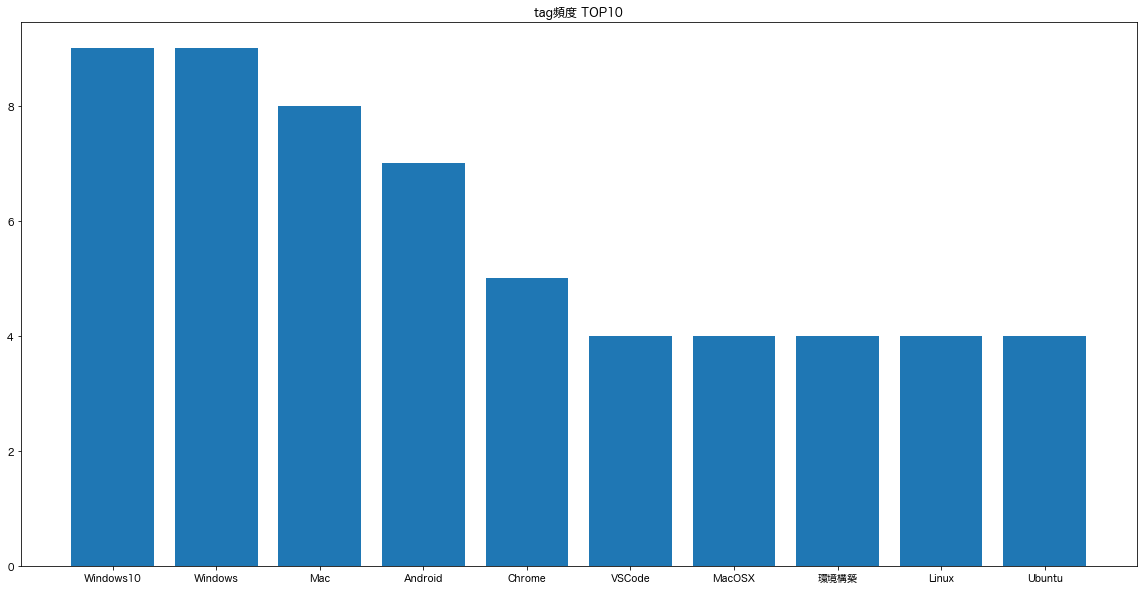

In [111]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from collections import Counter
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Hiragino Maru Gothic Pro', 'Yu Gothic', 'Meirio', 'Takao', 'IPAexGothic', 'IPAPGothic', 'VL PGothic', 'Noto Sans CJK JP']


def check_tag(index):
    c = corpus[index]
    vec_lda = lda[c]

    s = doc_index.__getitem__(vec_lda)
    s = sorted(enumerate(s), key=lambda t: t[1], reverse=True)
    
    print(s[:15])
    
    
    frequency = Counter()
    
    for doc_id, sim in s[1:100]:
        tags = df_content['tags_str'][doc_id]
        frequency.update(tags.split(','))
        
    # TOP20のグラフ           
    x = range(10)
    mc = frequency.most_common(10)              # 頻度TOP20を抽出
    ch = [ch[0] for ch in mc]           # ひらがなのリスト
    f = np.array([ch[1] for ch in mc])  # 頻度の数値のリスト


    fig = plt.figure(figsize=(20, 10))
    ax = fig.add_subplot(111)

    ax.bar(x, f)
    ax.set_xticks(x)
    ax.set_xticklabels(ch , fontsize=10)  #日本語表示はfontproperties=fp
    ax.set_title("tag頻度 TOP10")

    plt.show()
    
    
check_tag(0)

[(10, 1.0), (2238, 0.8862544), (1554, 0.8853122), (7864, 0.8847274), (7030, 0.88421255), (227, 0.8780832), (3000, 0.87795264), (448, 0.86946887), (562, 0.86072856), (98, 0.85789466), (4701, 0.85664374), (2439, 0.8508081), (1524, 0.84966975), (7601, 0.84682083), (2881, 0.84142065)]


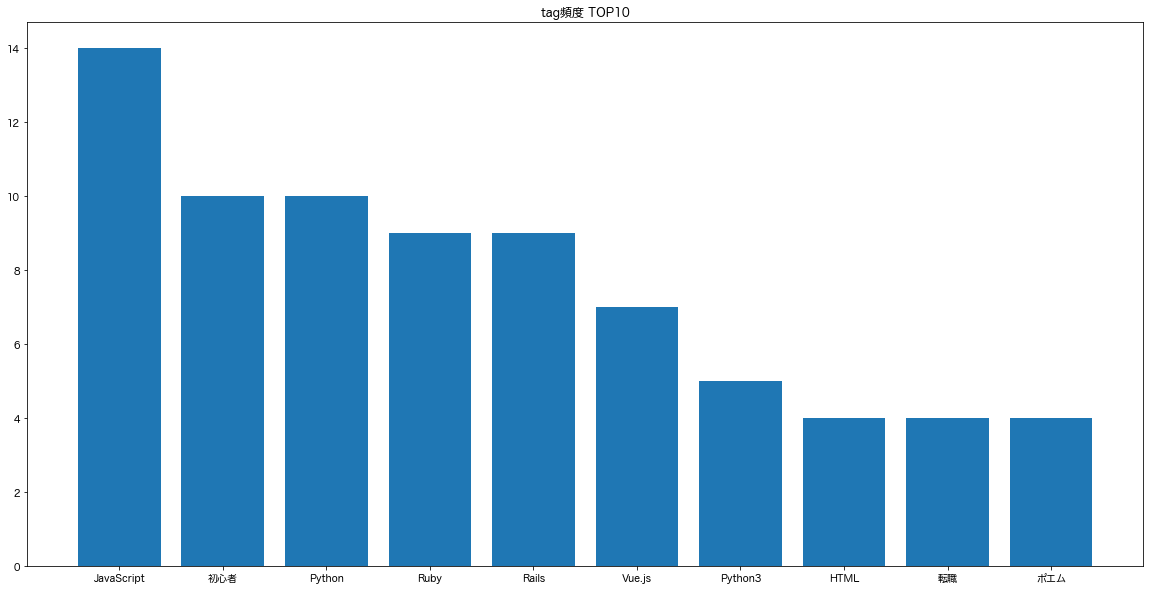

In [112]:
check_tag(10)

[(20, 1.0), (3796, 0.99734604), (3104, 0.9971307), (572, 0.98392177), (8136, 0.9766383), (44, 0.9707874), (784, 0.967509), (4217, 0.9655885), (2602, 0.9653461), (7894, 0.9644503), (1298, 0.964066), (7799, 0.96329075), (811, 0.9615761), (7956, 0.9611647), (2600, 0.95850074)]


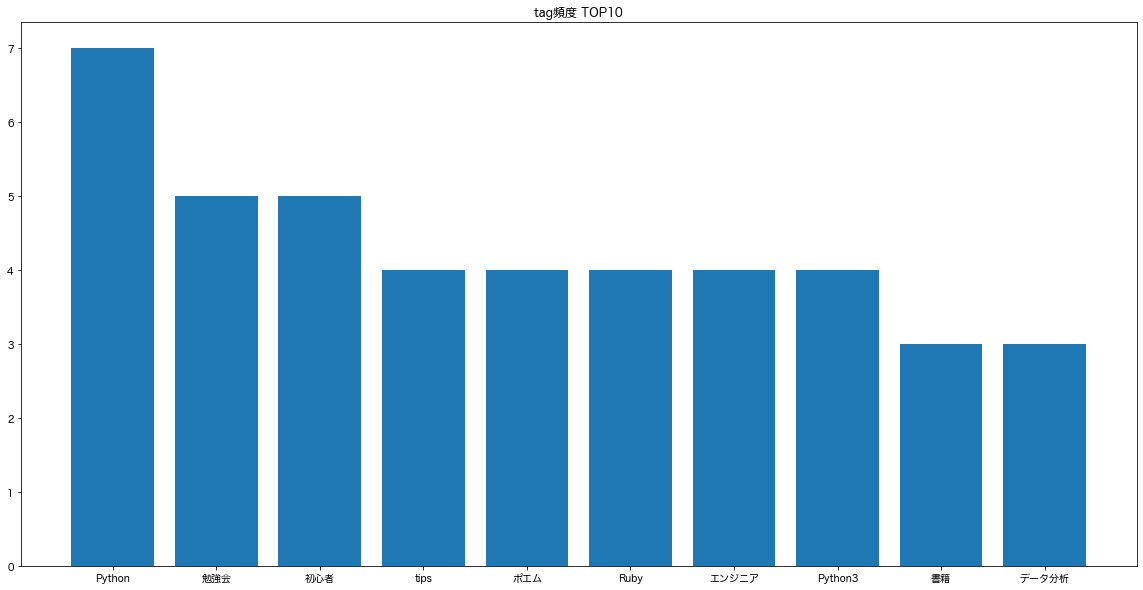

In [116]:
check_tag(20)

[(2, 0.99999946), (3517, 0.78804), (3536, 0.76255757), (101, 0.73011965), (4968, 0.7294658), (3062, 0.72819346), (4142, 0.72775066), (1971, 0.7200485), (4141, 0.71347815), (3259, 0.71169585), (3835, 0.7095678), (7293, 0.6987186), (4, 0.6965829), (5503, 0.6941552), (3519, 0.693528)]


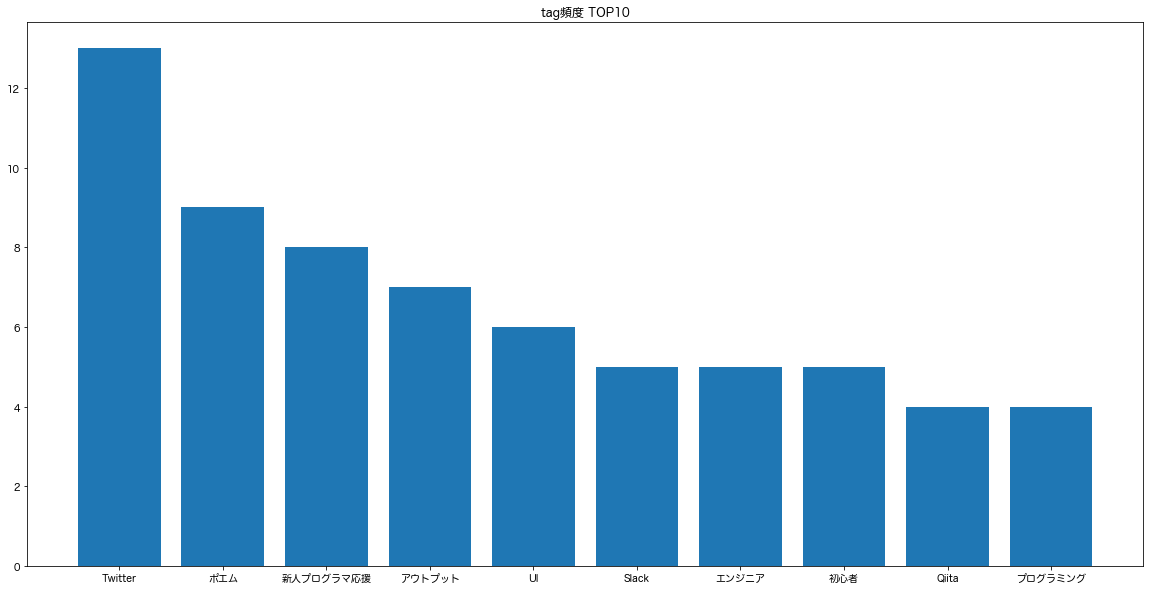

In [117]:
check_tag(2)

# 保存

In [48]:
# d.save_as_text("data/dict.txt")
# corpora.MmCorpus.serialize("data/cop.mm", corpus)
# lda.save("data/lda.model")
doc_index.save("data/sim")

saving MatrixSimilarity object under data/sim, separately None
saved data/sim


In [ ]:
from gensim import models, corpora, similarities

corpus = corpora.MmCorpus("data/cop.mm")
lda = models.ldamodel.LdaModel.load("data/lda.model")
d = corpora.Dictionary.load_from_text("data/dict.txt")
doc_index = similarities.docsim.MatrixSimilarity.load("data/sim")

In [ ]:
doc_index.__getitem__(lda[corpus[0]])